In [113]:
# Jovian Commit Essentials
!pip install jovian --upgrade -q
import jovian
jovian.set_project('rental-bike-2ndmidterm')
jovian.set_colab_id('1WeBuJeB0LuzAn07yOYbC_WLtfrHG0Fzm')

In [2]:
!pip install -U git+https://github.com/gatto/ds-bigdata.git
!pip install rich
!rm /etc/localtime
!ln -s /usr/share/zoneinfo/Europe/Rome /etc/localtime
!date
!pip install geopandas
!pip install pygeos

  Cloning https://github.com/gatto/ds-bigdata.git to /tmp/pip-req-build-yxfayr87
  Running command git clone -q https://github.com/gatto/ds-bigdata.git /tmp/pip-req-build-yxfayr87
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for extractbda: filename=extractbda-0.5-py3-none-any.whl size=547832 sha256=b98313bdf159323487a1272efb9162bcdf643748745fb06926834f0c984660d5
  Stored in directory: /tmp/pip-ephem-wheel-cache-tk94quu_/wheels/65/87/46/3bd8b72398b13604298d6babe6e2c27b9704ca35bd2ecaae98
Successfully built extractbda
     |████████████████████████████████| 214 kB 7.7 MB/s 
     |████████████████████████████████| 51 kB 7.8 MB/s 
Tue Dec 14 16:28:43 CET 2021
     |████████████████████████████████| 1.0 MB 7.8 MB/s 
     |████████████████████████████████| 6.3 MB 37.4 MB/s 
     |████████████████████████████████| 15.4 MB 27.6 MB/s 
     |████████████████████████████████| 2.1 MB 8.7 MB/s 


In [3]:
import folium
import geopandas as gpd
import geopy
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pydotplus
import pygeos
import seaborn as sns
import statsmodels.api as sm
from extractbda import Bikes
from folium import plugins
from google.colab import drive
from IPython.display import Image
from pandas import read_csv
from rich import pretty, print
from rich.console import Console
from rich.table import Table
from scipy.stats import loguniform
from shapely.geometry import LineString, Point, Polygon
from sklearn import tree
from sklearn.cross_decomposition import PLSRegression
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso, LinearRegression, LogisticRegression, Ridge
from sklearn.metrics import (
    SCORERS,
    accuracy_score,
    auc,
    classification_report,
    confusion_matrix,
    f1_score,
    mean_absolute_error,
    mean_squared_error,
    plot_confusion_matrix,
    r2_score,
    roc_auc_score,
    roc_curve,
)
from sklearn.model_selection import (
    GridSearchCV,
    RandomizedSearchCV,
    RepeatedKFold,
    train_test_split,
)
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder, PolynomialFeatures, StandardScaler
from sklearn.tree import DecisionTreeRegressor

pretty.install()
console = Console()
pd.set_option("display.max_rows", 200)
drive.mount("/content/drive")

/usr/local/lib/python3.7/dist-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string
/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Mounted at /content/drive


#Creation of station clusters

###Loading our datasets

First we read the datasets referred to 2011 and 2012, and day.csv

In [4]:
df_11= pd.read_csv('/content/drive/Shareddrives/BigData_project/data/2011-capitalbikeshare-tripdata.csv')
df_q1= pd.read_csv('/content/drive/Shareddrives/BigData_project/data/2012Q1-capitalbikeshare-tripdata.csv')
df_q2= pd.read_csv('/content/drive/Shareddrives/BigData_project/data/2012Q2-capitalbikeshare-tripdata.csv')
df_q3= pd.read_csv('/content/drive/Shareddrives/BigData_project/data/2012Q3-capitalbikeshare-tripdata.csv')
df_q4= pd.read_csv('/content/drive/Shareddrives/BigData_project/data/2012Q4-capitalbikeshare-tripdata.csv')

In [5]:
df_11.head()

,Duration,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type
0,3548,2011-01-01 00:01:29,2011-01-01 01:00:37,31620,5th & F St NW,31620,5th & F St NW,W00247,Member
1,346,2011-01-01 00:02:46,2011-01-01 00:08:32,31105,14th & Harvard St NW,31101,14th & V St NW,W00675,Casual
2,562,2011-01-01 00:06:13,2011-01-01 00:15:36,31400,Georgia & New Hampshire Ave NW,31104,Adams Mill & Columbia Rd NW,W00357,Member
3,434,2011-01-01 00:09:21,2011-01-01 00:16:36,31111,10th & U St NW,31503,Florida Ave & R St NW,W00970,Member
4,233,2011-01-01 00:28:26,2011-01-01 00:32:19,31104,Adams Mill & Columbia Rd NW,31106,Calvert & Biltmore St NW,W00346,Casual


In [6]:
df_d= pd.read_csv('/content/drive/Shareddrives/BigData_project/data/day.csv')

In [7]:
df_d.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Transformation of the date attribute

In [8]:
df_d['dteday']= pd.to_datetime(df_d['dteday'])

In [9]:
def convert_startdate(df):
    df['Start date']= pd.to_datetime(df['Start date'])
    df['Start date'] = list(map(lambda x: x.replace(hour=0, minute=0, second=0), df['Start date']))

In [10]:
convert_startdate(df_11)
convert_startdate(df_q1)
convert_startdate(df_q2)
convert_startdate(df_q3)
convert_startdate(df_q4)

In [11]:
df_q4.head()

,Duration,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type
0,611,2012-10-01,2012-10-01 00:12:17,31230,Metro Center / 12th & G St NW,31212,21st & M St NW,W00311,Member
1,612,2012-10-01,2012-10-01 00:13:05,31624,North Capitol St & F St NW,31251,12th & L St NW,W00137,Member
2,734,2012-10-01,2012-10-01 00:18:48,31234,20th & O St NW / Dupont South,31223,Convention Center / 7th & M St NW,W20125,Member
3,219,2012-10-01,2012-10-01 00:11:06,31106,Calvert & Biltmore St NW,31104,Adams Mill & Columbia Rd NW,W01451,Member
4,924,2012-10-01,2012-10-01 00:22:53,31109,7th & T St NW,31615,6th & H St NE,W00441,Member


In [12]:
df_12= pd.concat([df_q1,df_q2,df_q3,df_q4])
df_12.reset_index(drop=True, inplace=True)
df_12

,Duration,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type
0,475,2012-01-01,2012-01-01 00:11:56,31245,7th & R St NW / Shaw Library,31109,7th & T St NW,W01412,Member
1,1162,2012-01-01,2012-01-01 00:29:28,31400,Georgia & New Hampshire Ave NW,31103,16th & Harvard St NW,W00524,Casual
2,1145,2012-01-01,2012-01-01 00:29:28,31400,Georgia & New Hampshire Ave NW,31103,16th & Harvard St NW,W00235,Member
3,485,2012-01-01,2012-01-01 00:23:46,31101,14th & V St NW,31602,Park Rd & Holmead Pl NW,W00864,Member
4,471,2012-01-01,2012-01-01 00:23:34,31102,11th & Kenyon St NW,31109,7th & T St NW,W00995,Member
...,...,...,...,...,...,...,...,...,...
2028906,8630,2012-12-31,2013-01-01 02:15:29,31619,Lincoln Park / 13th & East Capitol St NE,31619,Lincoln Park / 13th & East Capitol St NE,W00704,Casual
2028907,418,2012-12-31,2013-01-01 00:03:17,31101,14th & V St NW,31200,Massachusetts Ave & Dupont Circle NW,W00098,Member
2028908,384,2012-12-31,2013-01-01 00:03:00,31101,14th & V St NW,31200,Massachusetts Ave & Dupont Circle NW,W01398,Member
2028909,448,2012-12-31,2013-01-01 00:05:49,31613,Eastern Market Metro / Pennsylvania Ave & 7th ...,31607,14th & D St SE,W01301,Member


In [13]:
del(df_q1)
del(df_q2)
del(df_q3)
del(df_q4)

At this point we have the column Start_date that referrs to the day which refers to the day we will try to predict the total bike cnt.

### Merging dataframe

In [14]:
sel=[]
not_sel= ['casual','registered','cnt']
for c in df_d.columns:
    if c not in not_sel:
        sel.append(c)
sel

[
    'instant',
    'dteday',
    'season',
    'yr',
    'mnth',
    'holiday',
    'weekday',
    'workingday',
    'weathersit',
    'temp',
    'atemp',
    'hum',
    'windspeed'
]

In [15]:
sel_station=['Start date','Start station','Member type']

In [16]:
df_new= df_d[sel].merge(pd.concat([df_11,df_12])[sel_station], left_on='dteday', right_on='Start date')

In [17]:
df_new.drop(['Start date','instant'], axis=1, inplace=True)

In [18]:
df_new.rename(columns={'Start station':'station'}, inplace=True)

In [19]:
df_new

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,station,Member type
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,5th & F St NW,Member
1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,14th & Harvard St NW,Casual
2,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,Georgia & New Hampshire Ave NW,Member
3,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,10th & U St NW,Member
4,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,Adams Mill & Columbia Rd NW,Casual
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3255673,2012-12-31,1,1,12,0,1,1,2,0.215833,0.223487,0.577500,0.154846,Lincoln Park / 13th & East Capitol St NE,Casual
3255674,2012-12-31,1,1,12,0,1,1,2,0.215833,0.223487,0.577500,0.154846,14th & V St NW,Member
3255675,2012-12-31,1,1,12,0,1,1,2,0.215833,0.223487,0.577500,0.154846,14th & V St NW,Member
3255676,2012-12-31,1,1,12,0,1,1,2,0.215833,0.223487,0.577500,0.154846,Eastern Market Metro / Pennsylvania Ave & 7th ...,Member


In [20]:
df_new[df_new['station'].isnull()]

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,station,Member type


In [21]:
grp= [c for c in df_new.columns if c!='Member type']
grp

[
    'dteday',
    'season',
    'yr',
    'mnth',
    'holiday',
    'weekday',
    'workingday',
    'weathersit',
    'temp',
    'atemp',
    'hum',
    'windspeed',
    'station'
]

In [22]:
df_new[df_new['Member type']=='Unknown'].index

Int64Index([ 414633,  424868,  787755, 1059539, 1384594, 1554304, 1700456,
            1702913, 1706947, 2083866, 2235600, 2355289, 2355493, 2355524,
            2794118, 2911773, 3003040, 3003632, 3003640, 3037297, 3138318],
           dtype='int64')

In [23]:
df_new.drop(df_new[df_new['Member type']=='Unknown'].index, inplace=True, axis=0)

In [24]:
df_new.reset_index(inplace=True, drop=True)

In [25]:
df_new

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,station,Member type
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,5th & F St NW,Member
1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,14th & Harvard St NW,Casual
2,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,Georgia & New Hampshire Ave NW,Member
3,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,10th & U St NW,Member
4,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,Adams Mill & Columbia Rd NW,Casual
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3255652,2012-12-31,1,1,12,0,1,1,2,0.215833,0.223487,0.577500,0.154846,Lincoln Park / 13th & East Capitol St NE,Casual
3255653,2012-12-31,1,1,12,0,1,1,2,0.215833,0.223487,0.577500,0.154846,14th & V St NW,Member
3255654,2012-12-31,1,1,12,0,1,1,2,0.215833,0.223487,0.577500,0.154846,14th & V St NW,Member
3255655,2012-12-31,1,1,12,0,1,1,2,0.215833,0.223487,0.577500,0.154846,Eastern Market Metro / Pennsylvania Ave & 7th ...,Member


## Grouping

Then we group by station and count the number of registered and casual users (and the total number)

In [26]:
def registered_count(grp):
    d= dict(zip(grp.value_counts().index, grp.value_counts()))
    try:
        return d['Member']
    except:
        return 0

In [27]:
def casual_count(grp):
    d= dict(zip(grp.value_counts().index, grp.value_counts()))
    try:
        return d['Casual']
    except:
        return 0

In [28]:
df= df_new.groupby(grp).agg(casual=('Member type', lambda x: casual_count(x)),
                                          registered=('Member type', lambda x: registered_count(x)),
                                          cnt=('Member type', 'count'))
df.reset_index(inplace=True)
df

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,station,casual,registered,cnt
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,10th & Monroe St NE,0,1,1
1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,10th & U St NW,5,17,22
2,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,10th St & Constitution Ave NW,15,11,26
3,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,11th & Kenyon St NW,1,9,10
4,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,12th & Army Navy Dr,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97480,2012-12-31,1,1,12,0,1,1,2,0.215833,0.223487,0.577500,0.154846,Wilson Blvd & Franklin Rd,0,5,5
97481,2012-12-31,1,1,12,0,1,1,2,0.215833,0.223487,0.577500,0.154846,Wilson Blvd & N Edgewood St,0,1,1
97482,2012-12-31,1,1,12,0,1,1,2,0.215833,0.223487,0.577500,0.154846,Wilson Blvd & N Quincy St,0,6,6
97483,2012-12-31,1,1,12,0,1,1,2,0.215833,0.223487,0.577500,0.154846,Wilson Blvd & N Uhle St,0,9,9


## Station

Getting the stations.csv computed in the 1st midterm file and call it geo_df

In [29]:
def read_geodf(filename):
    df= pd.read_csv(filename)
    
    geometry = [Point(xy) for xy in zip(df.long, df.lat)]
    df['geometry']= geometry
    
    crs = {'init': 'epsg:4326'}
    geo_df = gpd.GeoDataFrame(df, crs=crs, geometry=geometry)
    
    return geo_df

In [30]:
geo_df= read_geodf('/content/drive/Shareddrives/BigData_project/data/stations.csv')

/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [31]:
geo_df

,station,number,lat,long,geometry
0,5th & F St NW,31620,38.897222,-77.019347,POINT (-77.01935 38.89722)
1,14th & Harvard St NW,31105,38.926800,-77.032200,POINT (-77.03220 38.92680)
2,Georgia & New Hampshire Ave NW,31400,38.936043,-77.024649,POINT (-77.02465 38.93604)
3,10th & U St NW,31111,38.917200,-77.025900,POINT (-77.02590 38.91720)
4,Adams Mill & Columbia Rd NW,31104,38.922925,-77.042581,POINT (-77.04258 38.92292)
5,3rd & D St SE,31605,38.885100,-77.002300,POINT (-77.00230 38.88510)
6,14th & Rhode Island Ave NW,31203,38.908600,-77.032300,POINT (-77.03230 38.90860)
7,15th & P St NW,31201,38.909850,-77.034438,POINT (-77.03444 38.90985)
8,Van Ness Metro / UDC,31300,38.944551,-77.063896,POINT (-77.06390 38.94455)
9,Crystal City Metro / 18th & Bell St,31007,38.857300,-77.051100,POINT (-77.05110 38.85730)


## Try to cluster in a smart way the stations

We want to cluster in a smart way the stations, so we get the following 3 geojson from https://opendata.dc.gov/ :
- *washington_ward.geojson*, containing the 8 ward splitting of Washington
- *alexandria_boundaries.geojson*, containing alexandria boundaries
- *arlington_boundaries.geojson*, containing arlington boundaries

Moreover we want to split arlington in 2 zone one with centroid in the airport and the other in the Arlington center, because the stations densities are distinct. In order to do this we use Polygon's operation, overlay with difference.

In [32]:
arl= gpd.read_file('/content/drive/Shareddrives/BigData_project/data/arlington_boundaries.geojson')

In [33]:
dc= gpd.read_file('/content/drive/Shareddrives/BigData_project/data/washington_ward.geojson')

In [34]:
ale= gpd.read_file('/content/drive/Shareddrives/BigData_project/data/alexandria_boundaries.geojson')

In [35]:
attr=['name','geometry']

In [36]:
arl[attr]

,name,geometry
0,Arlington,"POLYGON ((-77.17228 38.89325, -77.17217 38.893..."


In [37]:
ale[attr]

,name,geometry
0,Alexandria,"POLYGON ((-77.14436 38.81036, -77.14397 38.810..."


In [38]:
dc['QUADRANT']='DC '+ dc['NAME']

In [39]:
dc.rename(columns={'QUADRANT':'name'}, inplace=True)

In [40]:
dc[attr]

,name,geometry
0,DC Ward 8,"POLYGON ((-76.97229 38.87286, -76.97240 38.872..."
1,DC Ward 6,"POLYGON ((-77.01790 38.91410, -77.01801 38.914..."
2,DC Ward 7,"POLYGON ((-76.94186 38.91854, -76.94200 38.918..."
3,DC Ward 2,"POLYGON ((-77.04946 38.91999, -77.04973 38.920..."
4,DC Ward 1,"POLYGON ((-77.03523 38.93743, -77.03570 38.937..."
5,DC Ward 5,"POLYGON ((-76.99144 38.95730, -76.99163 38.957..."
6,DC Ward 3,"POLYGON ((-77.05808 38.95676, -77.05809 38.956..."
7,DC Ward 4,"POLYGON ((-77.04097 38.99597, -77.07174 38.971..."


In [41]:
partition= pd.concat([arl[attr],ale[attr],dc[attr]])

In [42]:
partition.reset_index(inplace=True, drop=True)

In [43]:
partition

,name,geometry
0,Arlington,"POLYGON ((-77.17228 38.89325, -77.17217 38.893..."
1,Alexandria,"POLYGON ((-77.14436 38.81036, -77.14397 38.810..."
2,DC Ward 8,"POLYGON ((-76.97229 38.87286, -76.97240 38.872..."
3,DC Ward 6,"POLYGON ((-77.01790 38.91410, -77.01801 38.914..."
4,DC Ward 7,"POLYGON ((-76.94186 38.91854, -76.94200 38.918..."
5,DC Ward 2,"POLYGON ((-77.04946 38.91999, -77.04973 38.920..."
6,DC Ward 1,"POLYGON ((-77.03523 38.93743, -77.03570 38.937..."
7,DC Ward 5,"POLYGON ((-76.99144 38.95730, -76.99163 38.957..."
8,DC Ward 3,"POLYGON ((-77.05808 38.95676, -77.05809 38.956..."
9,DC Ward 4,"POLYGON ((-77.04097 38.99597, -77.07174 38.971..."


In [44]:
geo_df[geo_df['station']=='N Quincy St & Glebe Rd']

,station,number,lat,long,geometry
164,N Quincy St & Glebe Rd,31035,38.876393,-77.107735,POINT (-77.10773 38.87639)


In [45]:
geo_df[geo_df['station']=='Barcroft Community Center']

,station,number,lat,long,geometry
161,Barcroft Community Center,31033,38.850337,-77.100989,POINT (-77.10099 38.85034)


In [46]:
(geo_df.at[161,'lat']+geo_df.at[164,'lat'])/2

38.863365

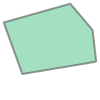

In [47]:
pol = Polygon(
    [
        [-77.1399536, 38.8656439],
        [-77.1128998, 38.7909081],
        [-77.1128998, 38.7909081],
        [-77.0057831, 38.8087999],
        [-77.0054397, 38.8083095],
        [-77.0109329, 38.8548709],
        [-77.0432739, 38.8930118],
        [-77.1396789, 38.8658378],
    ]
)
pol

In [48]:
util= pd.DataFrame(columns=['name','geometry'])
util

,name,geometry


In [49]:
util= util.append(dict({'name':'tosubtract', 'geometry':pol}),ignore_index=True)

In [50]:
crs = {'init': 'epsg:4326'}
geo_util = gpd.GeoDataFrame(util, crs=crs, geometry=util['geometry'])

/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [51]:
geo_util

,name,geometry
0,tosubtract,"POLYGON ((-77.13995 38.86564, -77.11290 38.790..."


In [52]:
res= arl.overlay(geo_util, how='difference')

/usr/local/lib/python3.7/dist-packages/geopandas/geodataframe.py:2197: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: +init=epsg:4326 +type=crs

  self, right, how=how, keep_geom_type=keep_geom_type, make_valid=make_valid


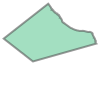

In [53]:
res.at[0,'geometry']

In [54]:
res1= arl.overlay(res, how='difference')

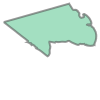

In [55]:
res1.at[0,'geometry']

In [56]:
res['geometry']

In [57]:
partition.drop(0, axis=0, inplace=True)

In [58]:
partition= partition.append(dict({'name':'Arlington 1', 'geometry':res.at[0,'geometry']}),ignore_index=True)

In [59]:
partition= partition.append(dict({'name':'Arlington 2', 'geometry':res1.at[0,'geometry']}),ignore_index=True)

In [60]:
partition.reset_index(drop=True, inplace=True)

In [61]:
partition

,name,geometry
0,Alexandria,"POLYGON ((-77.14436 38.81036, -77.14397 38.810..."
1,DC Ward 8,"POLYGON ((-76.97229 38.87286, -76.97240 38.872..."
2,DC Ward 6,"POLYGON ((-77.01790 38.91410, -77.01801 38.914..."
3,DC Ward 7,"POLYGON ((-76.94186 38.91854, -76.94200 38.918..."
4,DC Ward 2,"POLYGON ((-77.04946 38.91999, -77.04973 38.920..."
5,DC Ward 1,"POLYGON ((-77.03523 38.93743, -77.03570 38.937..."
6,DC Ward 5,"POLYGON ((-76.99144 38.95730, -76.99163 38.957..."
7,DC Ward 3,"POLYGON ((-77.05808 38.95676, -77.05809 38.956..."
8,DC Ward 4,"POLYGON ((-77.04097 38.99597, -77.07174 38.971..."
9,Arlington 1,"POLYGON ((-77.17217 38.89333, -77.17189 38.893..."


The next step is to do a spatial join between partitions and stations. So we can group by zone and sum up the previus measure

In [62]:
geo_df= geo_df.sjoin(partition, how='inner', predicate='intersects')

/usr/local/lib/python3.7/dist-packages/geopandas/geodataframe.py:1938: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: +init=epsg:4326 +type=crs
Right CRS: EPSG:4326

  return geopandas.sjoin(left_df=self, right_df=df, *args, **kwargs)


In [63]:
geo_df.rename(columns={'name':'station zone'}, inplace=True)

In [64]:
geo_df

,station,number,lat,long,geometry,index_right,station zone
0,5th & F St NW,31620,38.897222,-77.019347,POINT (-77.01935 38.89722),4,DC Ward 2
6,14th & Rhode Island Ave NW,31203,38.908600,-77.032300,POINT (-77.03230 38.90860),4,DC Ward 2
7,15th & P St NW,31201,38.909850,-77.034438,POINT (-77.03444 38.90985),4,DC Ward 2
10,14th & R St NW,31202,38.912682,-77.031681,POINT (-77.03168 38.91268),4,DC Ward 2
11,21st & M St NW,31212,38.905340,-77.046774,POINT (-77.04677 38.90534),4,DC Ward 2
16,New Hampshire Ave & T St NW,31229,38.915540,-77.038180,POINT (-77.03818 38.91554),4,DC Ward 2
23,17th & K St NW,31213,38.902760,-77.038630,POINT (-77.03863 38.90276),4,DC Ward 2
26,18th & M St NW,31221,38.904742,-77.041606,POINT (-77.04161 38.90474),4,DC Ward 2
28,19th & L St NW,31224,38.903407,-77.043648,POINT (-77.04365 38.90341),4,DC Ward 2
30,19th St & Pennsylvania Ave NW,31100,38.900300,-77.042900,POINT (-77.04290 38.90030),4,DC Ward 2


In [65]:
geo_df.sort_index(inplace=True)

In [66]:
geo_df

,station,number,lat,long,geometry,index_right,station zone
0,5th & F St NW,31620,38.897222,-77.019347,POINT (-77.01935 38.89722),4,DC Ward 2
1,14th & Harvard St NW,31105,38.926800,-77.032200,POINT (-77.03220 38.92680),5,DC Ward 1
2,Georgia & New Hampshire Ave NW,31400,38.936043,-77.024649,POINT (-77.02465 38.93604),8,DC Ward 4
3,10th & U St NW,31111,38.917200,-77.025900,POINT (-77.02590 38.91720),5,DC Ward 1
4,Adams Mill & Columbia Rd NW,31104,38.922925,-77.042581,POINT (-77.04258 38.92292),5,DC Ward 1
5,3rd & D St SE,31605,38.885100,-77.002300,POINT (-77.00230 38.88510),2,DC Ward 6
6,14th & Rhode Island Ave NW,31203,38.908600,-77.032300,POINT (-77.03230 38.90860),4,DC Ward 2
7,15th & P St NW,31201,38.909850,-77.034438,POINT (-77.03444 38.90985),4,DC Ward 2
8,Van Ness Metro / UDC,31300,38.944551,-77.063896,POINT (-77.06390 38.94455),7,DC Ward 3
9,Crystal City Metro / 18th & Bell St,31007,38.857300,-77.051100,POINT (-77.05110 38.85730),10,Arlington 2


In [67]:
df_part =df.merge(geo_df[['station','station zone']], left_on='station', right_on='station')

In [68]:
grp.remove('station')

In [69]:
grp.append('station zone')

In [70]:
df_part= df_part.groupby(grp).sum()

In [71]:
df_part.reset_index(inplace=True)

In [72]:
df_part

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,station zone,casual,registered,cnt
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,Arlington 2,10,31,41
1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,DC Ward 1,51,190,241
2,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,DC Ward 2,187,223,410
3,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,DC Ward 3,11,11,22
4,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,DC Ward 4,3,22,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7268,2012-12-31,1,1,12,0,1,1,2,0.215833,0.223487,0.577500,0.154846,DC Ward 4,2,54,56
7269,2012-12-31,1,1,12,0,1,1,2,0.215833,0.223487,0.577500,0.154846,DC Ward 5,6,85,91
7270,2012-12-31,1,1,12,0,1,1,2,0.215833,0.223487,0.577500,0.154846,DC Ward 6,74,640,714
7271,2012-12-31,1,1,12,0,1,1,2,0.215833,0.223487,0.577500,0.154846,DC Ward 7,0,7,7


In [73]:
m = folium.Map(location=[geo_df['lat'].mean(), geo_df['long'].mean()],
               tiles='OpenStreetMap',
               zoom_start=13,
              )
clr=['red', 'blue', 'green', 'purple', 'orange', 'lightred', 'pink', 'lightblue', 'lightgreen', 'gray','lightgray']

for zn,c in zip(partition['name'],clr):
    for index,row in geo_df[geo_df['station zone']==zn].iterrows():
        name= row['station']

        folium.Marker(
            location= [row['geometry'].centroid.y,row['geometry'].centroid.x],
            popup= '<b>%s</b>'%(name),
            icon= folium.Icon(color=c, icon='map-marker')
        ).add_to(m)
        
for (_, r), c in zip(partition.iterrows(),clr):
    sim_geo = gpd.GeoSeries(r['geometry']).simplify(tolerance=0.001)
    geo_j = sim_geo.to_json()
    geo_j = folium.GeoJson(data=geo_j)
    folium.Popup(r['name']).add_to(geo_j)
    geo_j.add_to(m)
m

Make this Notebook Trusted to load map: File -> Trust Notebook <iframe src="about:blank" style="position:absolute;width:100%;height:100%;left:0;top:0;border:none !important;" data-html=%3C%21DOCTYPE%20html%3E%0A%3Chead%3E%20%20%20%20%0A%20%20%20%20%3Cmeta%20http-equiv%3D%22content-type%22%20content%3D%22text/html%3B%20charset%3DUTF-8%22%20/%3E%0A%20%20%20%20%3Cscript%3EL_PREFER_CANVAS%3Dfalse%3B%20L_NO_TOUCH%3Dfalse%3B%20L_DISABLE_3D%3Dfalse%3B%3C/script%3E%0A%20%20%20%20%3Cscript%20src%3D%22https%3A//cdn.jsdelivr.net/npm/leaflet%401.4.0/dist/leaflet.js%22%3E%3C/script%3E%0A%20%20%20%20%3Cscript%20src%3D%22https%3A//code.jquery.com/jquery-1.12.4.min.js%22%3E%3C/script%3E%0A%20%20%20%20%3Cscript%20src%3D%22https%3A//maxcdn.bootstrapcdn.com/bootstrap/3.2.0/js/bootstrap.min.js%22%3E%3C/script%3E%0A%20%20%20%20%3Cscript%20src%3D%22https%3A//cdnjs.cloudflare.com/ajax/libs/Leaflet.awesome-markers/2.0.2/leaflet.awesome-markers.js%22%3E%3C/script%3E%0A%20%20%20%20%3Clink%20rel%3D%22stylesheet%22%20href%3D%22https%3A//cdn.jsdelivr.net/npm/leaflet%401.4.0/dist/leaflet.css%22/%3E%0A%20%20%20%20%3Clink%20rel%3D%22stylesheet%22%20href%3D%22https%3A//maxcdn.bootstrapcdn.com/bootstrap/3.2.0/css/bootstrap.min.css%22/%3E%0A%20%20%20%20%3Clink%20rel%3D%22stylesheet%22%20href%3D%22https%3A//maxcdn.bootstrapcdn.com/bootstrap/3.2.0/css/bootstrap-theme.min.css%22/%3E%0A%20%20%20%20%3Clink%20rel%3D%22stylesheet%22%20href%3D%22https%3A//maxcdn.bootstrapcdn.com/font-awesome/4.6.3/css/font-awesome.min.css%22/%3E%0A%20%20%20%20%3Clink%20rel%3D%22stylesheet%22%20href%3D%22https%3A//cdnjs.cloudflare.com/ajax/libs/Leaflet.awesome-markers/2.0.2/leaflet.awesome-markers.css%22/%3E%0A%20%20%20%20%3Clink%20rel%3D%22stylesheet%22%20href%3D%22https%3A//rawcdn.githack.com/python-visualization/folium/master/folium/templates/leaflet.awesome.rotate.css%22/%3E%0A%20%20%20%20%3Cstyle%3Ehtml%2C%20body%20%7Bwidth%3A%20100%25%3Bheight%3A%20100%25%3Bmargin%3A%200%3Bpadding%3A%200%3B%7D%3C/style%3E%0A%20%20%20%20%3Cstyle%3E%23map%20%7Bposition%3Aabsolute%3Btop%3A0%3Bbottom%3A0%3Bright%3A0%3Bleft%3A0%3B%7D%3C/style%3E%0A%20%20%20%20%0A%20%20%20%20%3Cmeta%20name%3D%22viewport%22%20content%3D%22width%3Ddevice-width%2C%0A%20%20%20%20%20%20%20%20initial-scale%3D1.0%2C%20maximum-scale%3D1.0%2C%20user-scalable%3Dno%22%20/%3E%0A%20%20%20%20%3Cstyle%3E%23map_b8d4e80258a54ac382275fdbf314669f%20%7B%0A%20%20%20%20%20%20%20%20position%3A%20relative%3B%0A%20%20%20%20%20%20%20%20width%3A%20100.0%25%3B%0A%20%20%20%20%20%20%20%20height%3A%20100.0%25%3B%0A%20%20%20%20%20%20%20%20left%3A%200.0%25%3B%0A%20%20%20%20%20%20%20%20top%3A%200.0%25%3B%0A%20%20%20%20%20%20%20%20%7D%0A%20%20%20%20%3C/style%3E%0A%3C/head%3E%0A%3Cbody%3E%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%3Cdiv%20class%3D%22folium-map%22%20id%3D%22map_b8d4e80258a54ac382275fdbf314669f%22%20%3E%3C/div%3E%0A%3C/body%3E%0A%3Cscript%3E%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20bounds%20%3D%20null%3B%0A%20%20%20%20%0A%0A%20%20%20%20var%20map_b8d4e80258a54ac382275fdbf314669f%20%3D%20L.map%28%0A%20%20%20%20%20%20%20%20%27map_b8d4e80258a54ac382275fdbf314669f%27%2C%20%7B%0A%20%20%20%20%20%20%20%20center%3A%20%5B38.892461759793804%2C%20-77.03631318195879%5D%2C%0A%20%20%20%20%20%20%20%20zoom%3A%2013%2C%0A%20%20%20%20%20%20%20%20maxBounds%3A%20bounds%2C%0A%20%20%20%20%20%20%20%20layers%3A%20%5B%5D%2C%0A%20%20%20%20%20%20%20%20worldCopyJump%3A%20false%2C%0A%20%20%20%20%20%20%20%20crs%3A%20L.CRS.EPSG3857%2C%0A%20%20%20%20%20%20%20%20zoomControl%3A%20true%2C%0A%20%20%20%20%20%20%20%20%7D%29%3B%0A%0A%0A%20%20%20%20%0A%20%20%20%20var%20tile_layer_90790fbf799a43f1bef29f10f0654c17%20%3D%20L.tileLayer%28%0A%20%20%20%20%20%20%20%20%27https%3A//%7Bs%7D.tile.openstreetmap.org/%7Bz%7D/%7Bx%7D/%7By%7D.png%27%2C%0A%20%20%20%20%20%20%20%20%7B%0A%20%20%20%20%20%20%20%20%22attribution%22%3A%20null%2C%0A%20%20%20%20%20%20%20%20%22detectRetina%22%3A%20false%2C%0A%20%20%20%20%20%20%20%20%22maxNativeZoom%22%3A%2018%2C%0A%20%20%20%20

# Preprocessing

In [ ]:
df = pd.read_csv("/content/drive/Shareddrives/BigData_project/data/geo11.csv")
df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,station zone,casual,registered,cnt
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,Arlington 2,10,31,41
1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,DC Ward 1,51,190,241
2,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,DC Ward 2,187,223,410
3,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,DC Ward 3,11,11,22
4,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,DC Ward 4,3,22,25


We have a few attributes which we can't include in the OLS regression since they are categorical and qualitative and their "distance" is not fixed. These are: *weathersit*, *season*, *station zone*. Therefore we made k-1 dummies out of them, with k=unique values of attribute. k-1 to avoid the *dummy trap* effect.

In [ ]:
geo_df_SD = df
geo_df_SD = pd.get_dummies(data=geo_df_SD, columns=["season"])
geo_df_SD = geo_df_SD.rename(columns={
        "season_1": "winter",
        "season_2": "spring",
        "season_3": "summer",
        "season_4": "autumn",
        "station zone": "z"})
geo_df_SD = pd.get_dummies(data=geo_df_SD, columns=["z"])
geo_df_SD = pd.get_dummies(data=geo_df_SD, columns=["weathersit"])
geo_df_SD = geo_df_SD.rename(columns={
        "weathersit_1": "w_sunny",
        "weathersit_2": "w_cloudy",
        "weathersit_3": "w_rain",})
geo_df_SD = geo_df_SD.drop(columns=["casual", "registered", "z_Alexandria", "w_sunny", "winter"])  # we're dropping one dummy each category to avoid the dummy trap
geo_df_SD["dteday"] = pd.to_datetime(geo_df_SD["dteday"])
print(geo_df_SD.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7273 entries, 0 to 7272
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   dteday         7273 non-null   datetime64[ns]
 1   yr             7273 non-null   int64         
 2   mnth           7273 non-null   int64         
 3   holiday        7273 non-null   int64         
 4   weekday        7273 non-null   int64         
 5   workingday     7273 non-null   int64         
 6   temp           7273 non-null   float64       
 7   atemp          7273 non-null   float64       
 8   hum            7273 non-null   float64       
 9   windspeed      7273 non-null   float64       
 10  cnt            7273 non-null   int64         
 11  spring         7273 non-null   uint8         
 12  summer         7273 non-null   uint8         
 13  autumn         7273 non-null   uint8         
 14  z_Arlington 1  7273 non-null   uint8         
 15  z_Arlington 2  7273 n

None

Switching to our [**extract-bda** interface](https://github.com/gatto/ds-bigdata) (which has exactly the transformations seen above)

In [ ]:
d = Bikes()
d.geo_df_SD.head()

,dteday,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,autumn,z_Arlington 1,z_Arlington 2,z_DC Ward 1,z_DC Ward 2,z_DC Ward 3,z_DC Ward 4,z_DC Ward 5,z_DC Ward 6,z_DC Ward 7,z_DC Ward 8,w_cloudy,w_rain,season
0,2011-01-01,0,1,0,6,0,0.344167,0.363625,0.805833,0.160446,41,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1
1,2011-01-01,0,1,0,6,0,0.344167,0.363625,0.805833,0.160446,241,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1
2,2011-01-01,0,1,0,6,0,0.344167,0.363625,0.805833,0.160446,410,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1
3,2011-01-01,0,1,0,6,0,0.344167,0.363625,0.805833,0.160446,22,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1
4,2011-01-01,0,1,0,6,0,0.344167,0.363625,0.805833,0.160446,25,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1


In [ ]:
d.geo_df_SD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7273 entries, 0 to 7272
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   dteday         7273 non-null   datetime64[ns]
 1   yr             7273 non-null   int64         
 2   mnth           7273 non-null   int64         
 3   holiday        7273 non-null   int64         
 4   weekday        7273 non-null   int64         
 5   workingday     7273 non-null   int64         
 6   temp           7273 non-null   float64       
 7   atemp          7273 non-null   float64       
 8   hum            7273 non-null   float64       
 9   windspeed      7273 non-null   float64       
 10  cnt            7273 non-null   int64         
 11  spring         7273 non-null   uint8         
 12  summer         7273 non-null   uint8         
 13  autumn         7273 non-null   uint8         
 14  z_Arlington 1  7273 non-null   uint8         
 15  z_Arlington 2  7273 n

## Train-test split

We have decided to do a train/test split stratified on the *season* attribute. This because it appears from the initial data understanding that there is a strong seasonal effect and we don't want to dissolve this effect with a randomly imbalanced train/test split. Also, season is easy to stratify on, since it's a categorical variable. This is the same split decision that we will use for any algorithm.

In [ ]:
to_exclude = ('cnt', "dteday", "season")
class_name = "cnt"
attributes = [col for col in d.geo_df_SD.columns if col not in to_exclude]

In [ ]:
X = d.geo_df_SD[attributes]
y = d.geo_df_SD[class_name]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=420, stratify=d.geo_df_SD["season"])

# OLS Regression

## Linear

In [ ]:
d = Bikes(val=False)
x = d.d["x_train"][attributes]
y = d.d["y_train"]
x_test = d.d["x_test"][attributes]
y_test = d.d["y_test"]

x2 = sm.add_constant(x)
est = sm.OLS(y, x2)
est2 = est.fit()
print(est2.summary())

OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     1256.
Date:                Tue, 16 Nov 2021   Prob (F-statistic):               0.00
Time:                        23:00:39   Log-Likelihood:                -43919.
No. Observations:                6182   AIC:                         8.789e+04
Df Residuals:                    6157   BIC:                         8.806e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -380.3206     44.071     -8.630      0.000    -466.716    -293.925
yr              205.4804      7.694     26.706      0.000     190.397     220.564
mnth             -0.8364      2.014     -0.415      0.678      -4.785       3.112
holiday         -50.5691     23.136     -2.186      0.029     -95.924      -5.214
weekday           6.4625      1.905      3.393      0.001       2.729      10.196
workingday       13.2003      8.410      1.570      0.117      -3.287      29.687
temp            461.1898    169.885      2.715      0.007     128.155     794.224
atemp            53.8102    185.667      0.290      0.772    -310.162     417.783
hum            -134.2502     37.213     -3.608      0.000    -207.201     -61.299
windspeed      -312.4029     54.190     -5.765      0.000    -418.635    -206.171
spring          131.1690     14.593      8.988      0.000     102.562     159.776
summer          101.0876     20.853      4.848      0.000      60.209     141.966
autumn          169.4949     19.098      8.875      0.000     132.057     206.933
z_Arlington 1   172.0281     33.019      5.210      0.000     107.300     236.757
z_Arlington 2   199.1498     32.832      6.066      0.000     134.787     263.512
z_DC Ward 1     798.1446     32.860     24.289      0.000     733.727     862.562
z_DC Ward 2    2095.9770     32.848     63.808      0.000    2031.584    2160.370
z_DC Ward 3     194.5807     32.845      5.924      0.000     130.192     258.969
z_DC Ward 4     132.6937     32.852      4.039      0.000      68.293     197.095
z_DC Ward 5     171.9820     32.818      5.241      0.000     107.648     236.316
z_DC Ward 6    1151.8394     32.784     35.134      0.000    1087.571    1216.108
z_DC Ward 7      78.9867     32.875      2.403      0.016      14.541     143.433
z_DC Ward 8      61.9111     32.948      1.879      0.060      -2.678     126.500
w_cloudy        -46.4773     10.036     -4.631      0.000     -66.151     -26.804
w_rain         -201.8908     26.364     -7.658      0.000    -253.573    -150.209
==============================================================================
Omnibus:                      943.090   Durbin-Watson:                   2.113
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            15228.783
Skew:                           0.129   Prob(JB):                         0.00
Kurtosis:                      10.685   Cond. No.                         545.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.

In [ ]:
table = Table(title="Evaluation metrics on [b]test[/] set", show_header=True, header_style="bold magenta", caption_justify="left", caption="[red underline]MSE[/red underline]: Mean squared error")
table.add_column("n_cols", style="blue", justify="right")
table.add_column("Method", style="green")
table.add_column("R²", justify="right")
table.add_column("MSE", justify="right")

y_pred = est2.predict(sm.add_constant(x_test))
table.add_row(
    f"{x_test.shape[1]+1}",
    "Linear, complete",
    f"{r2_score(y_test.astype(float), y_pred):.3f}",
    f"{mean_squared_error(y_test.astype(float), y_pred):.1f}",
)
console.print(table)

        Evaluation metrics on test set         
┏━━━━━━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━┓
┃ n_cols ┃ Method           ┃    R² ┃     MSE ┃
┡━━━━━━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━┩
│     25 │ Linear, complete │ 0.842 │ 87388.0 │
└────────┴──────────────────┴───────┴─────────┘
MSE: Mean squared error                        

### Observations

This OLS linear regression has a few regressors that do not have enough of a statistical significance. These are as follows:

| regressor | p-test | comments |
| ---- | --- | --- |
| mnth | 67.8% | this effect is included in `season` |
| workingday | 11.7% | this is redundant to `holiday` |
| atemp | 77.2% | perceived temperature's effect is included in `temp` |

We have, therefore, removed them and run again the regression. The results follow:

In [ ]:
to_exclude = ["workingday", "atemp", "mnth"]  # <--------
attributes = [col for col in attributes if col not in to_exclude]

x = d.d["x_train"][attributes]
y = d.d["y_train"]
x_test = d.d["x_test"][attributes]
y_test = d.d["y_test"]

x2 = sm.add_constant(x)
est = sm.OLS(y, x2)
est2 = est.fit()
print(est2.summary())

OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     1435.
Date:                Tue, 16 Nov 2021   Prob (F-statistic):               0.00
Time:                        23:00:44   Log-Likelihood:                -43920.
No. Observations:                6182   AIC:                         8.788e+04
Df Residuals:                    6160   BIC:                         8.803e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -371.4623     42.496     -8.741      0.000    -454.769    -288.156
yr              205.2607      7.693     26.683      0.000     190.181     220.341
holiday         -60.5287     22.328     -2.711      0.007    -104.299     -16.758
weekday           6.4056      1.900      3.371      0.001       2.681      10.130
temp            513.4080     38.213     13.435      0.000     438.496     588.320
hum            -137.2373     36.925     -3.717      0.000    -209.624     -64.850
windspeed      -317.1929     53.293     -5.952      0.000    -421.665    -212.720
spring          129.1606     14.262      9.056      0.000     101.201     157.120
summer           95.4594     18.686      5.109      0.000      58.829     132.090
autumn          163.0601     12.005     13.582      0.000     139.526     186.595
z_Arlington 1   172.8487     32.964      5.244      0.000     108.228     237.469
z_Arlington 2   200.1156     32.743      6.112      0.000     135.928     264.304
z_DC Ward 1     798.9658     32.771     24.380      0.000     734.723     863.209
z_DC Ward 2    2096.8601     32.764     63.999      0.000    2032.631    2161.089
z_DC Ward 3     195.3958     32.763      5.964      0.000     131.168     259.623
z_DC Ward 4     133.7310     32.756      4.083      0.000      69.517     197.945
z_DC Ward 5     172.8610     32.732      5.281      0.000     108.695     237.027
z_DC Ward 6    1152.6226     32.702     35.247      0.000    1088.516    1216.729
z_DC Ward 7      79.7095     32.785      2.431      0.015      15.439     143.980
z_DC Ward 8      62.9875     32.862      1.917      0.055      -1.433     127.408
w_cloudy        -45.4625     10.003     -4.545      0.000     -65.072     -25.853
w_rain         -200.3809     26.288     -7.622      0.000    -251.915    -148.846
==============================================================================
Omnibus:                      943.716   Durbin-Watson:                   2.112
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            15337.244
Skew:                           0.123   Prob(JB):                         0.00
Kurtosis:                      10.712   Cond. No.                         105.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.

In [ ]:
y_pred = est2.predict(sm.add_constant(x_test))
table.add_row(
    f"{x_test.shape[1]+1}",
    "Linear, partial",
    f"{r2_score(y_test.astype(float), y_pred):.3f}",
    f"{mean_squared_error(y_test.astype(float), y_pred):.1f}",
)
console.print(table)

        Evaluation metrics on test set         
┏━━━━━━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━┓
┃ n_cols ┃ Method           ┃    R² ┃     MSE ┃
┡━━━━━━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━┩
│     25 │ Linear, complete │ 0.842 │ 87388.0 │
│     22 │ Linear, partial  │ 0.842 │ 87384.4 │
└────────┴──────────────────┴───────┴─────────┘
MSE: Mean squared error                        

As we can see now all the regressors are statistically significant at all levels commonly used.

## Non linear regressions
As we can see in this graph, *season* gives a parabolic trend to the target *cnt*.

Text(0, 0.5, 'cnt')

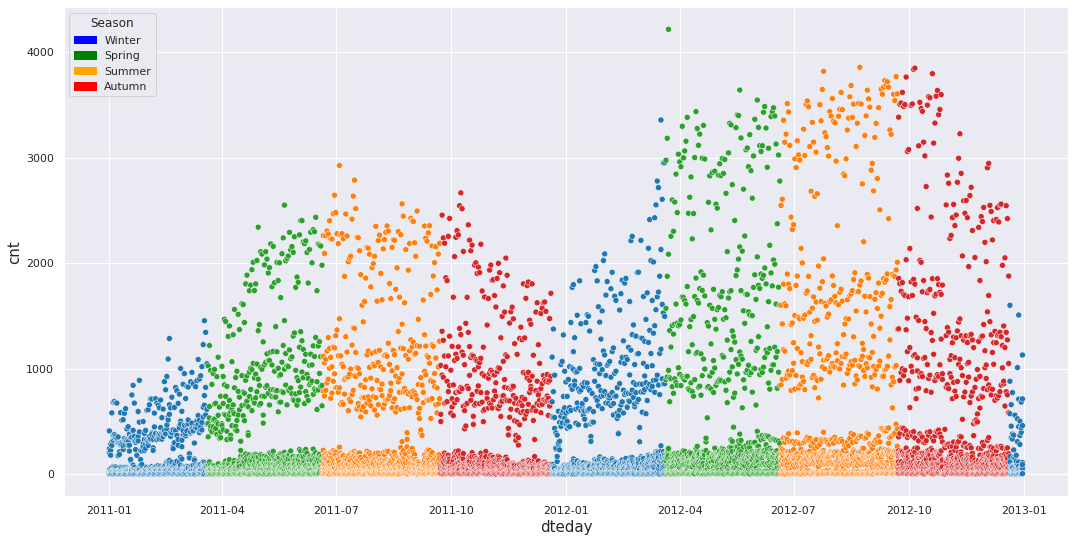

In [ ]:
sns.set(rc={'figure.figsize':(18,9)})

winter= mpatches.Patch( color='blue', label='Winter')
spring= mpatches.Patch(color='green', label='Spring')
summer= mpatches.Patch(color='orange', label='Summer')
autumn= mpatches.Patch(color='red', label='Autumn')

palette = ['tab:blue', 'tab:green', 'tab:orange', 'tab:red']
sns.scatterplot(data=d.geo_df_SD, x=d.geo_df_SD["dteday"], y=d.geo_df_SD["cnt"], hue=d.geo_df_SD["season"], palette=palette)
plt.legend(loc='upper left',title = 'Season',handles = [winter,spring,summer,autumn])
plt.xlabel('dteday', fontsize = 15)
plt.ylabel('cnt', fontsize = 15)

Therefore it makes sense to run a quadratic regression. Intuitively, there are also other features which may introduce a non linear behaviour. In introducing this non-linear regression with quadratic as well as interaction regressors we chose an automatic approach with the `PolynomialFeatures` sklearn method. This, for every pair of original features, introduces as regressors all of the following combinations:

- features $x, y$
- introduces $1, x, x^2, y, y^2, xy$

However, we don't need to do this for all our dummies. (quadratic dummies are not useful as well as interaction between dummies since any record will only have at most 1 dummy "on", never 2 or more.)

In [ ]:
d = Bikes(val=False)
dummies_columns = ["z_Arlington 1", "z_Arlington 2", "z_DC Ward 1", "z_DC Ward 2", "z_DC Ward 3", "z_DC Ward 4", 
                   "z_DC Ward 5", "z_DC Ward 6", "z_DC Ward 7", "z_DC Ward 8", "spring", "summer", "autumn", "w_cloudy", "w_rain"]
dummies_df = d.d["x_train"].loc[:, dummies_columns]
dummies_test_df = d.d["x_test"].loc[:, dummies_columns]

to_exclude = ['cnt', "dteday", "season"] + ["workingday", "atemp", "mnth"]
class_name = "cnt"
attributes = [col for col in d.d["x_train"].columns if (col not in to_exclude) and (col not in dummies_columns)]

x = d.d["x_train"][attributes]
y = d.d["y_train"]
x_test = d.d["x_test"][attributes]
y_test = d.d["y_test"]
# making polynomial for test
poly_test = PolynomialFeatures(degree=2)
x_test = poly_test.fit_transform(x_test)
transformed_test = pd.DataFrame(x_test, columns=poly_test.get_feature_names_out(), index=dummies_test_df.index)
complete_test = pd.concat([transformed_test, dummies_test_df], axis=1)

In [ ]:
poly = PolynomialFeatures(degree=2)
xp = poly.fit_transform(x)
transformed = pd.DataFrame(xp, columns=poly.get_feature_names_out(), index=dummies_df.index)

complete = pd.concat([transformed, dummies_df], axis=1)
print(f"We are now using a dataframe of {complete.shape} shape.")

We are now using a dataframe of (6182, 43) shape.

In [ ]:
est2 = sm.OLS(y, complete).fit()
ypred = est2.predict(complete)
print(est2.summary())

OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     773.2
Date:                Tue, 16 Nov 2021   Prob (F-statistic):               0.00
Time:                        23:00:53   Log-Likelihood:                -43845.
No. Observations:                6182   AIC:                         8.777e+04
Df Residuals:                    6141   BIC:                         8.805e+04
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
1                 -1052.9810    137.873     -7.637      0.000   -1323.260    -782.702
yr                  107.2629     26.028      4.121      0.000      56.238     158.287
holiday             -55.7426    103.608     -0.538      0.591    -258.850     147.365
weekday              13.6034     13.952      0.975      0.330     -13.747      40.954
temp               1682.0565    204.008      8.245      0.000    1282.129    2081.984
hum                1109.9297    283.110      3.920      0.000     554.935    1664.924
windspeed           877.8833    438.032      2.004      0.045      19.187    1736.580
yr^2                107.2629     26.028      4.121      0.000      56.238     158.287
yr holiday          -51.7560     45.032     -1.149      0.250    -140.035      36.523
yr weekday            7.8045      3.811      2.048      0.041       0.333      15.276
yr temp             126.0318     42.277      2.981      0.003      43.154     208.909
yr hum             -129.6762     57.159     -2.269      0.023    -241.729     -17.624
yr windspeed       -118.2729    104.267     -1.134      0.257    -322.673      86.127
holiday^2           -55.7426    103.608     -0.538      0.591    -258.850     147.365
holiday weekday     -38.4168     17.712     -2.169      0.030     -73.138      -3.696
holiday temp        272.2017    131.106      2.076      0.038      15.188     529.215
holiday hum         -87.1797    256.579     -0.340      0.734    -590.165     415.805
holiday windspeed   419.3121    343.537      1.221      0.222    -254.142    1092.766
weekday^2            -1.5344      1.084     -1.415      0.157      -3.660       0.591
weekday temp         -0.6238     10.530     -0.059      0.953     -21.266      20.019
weekday hum          -8.4382     14.093     -0.599      0.549     -36.064      19.188
weekday windspeed    20.0937     25.678      0.783      0.434     -30.244      70.432
temp^2            -1416.4771    151.698     -9.337      0.000   -1713.859   -1119.095
temp hum            136.6201    171.282      0.798      0.425    -199.153     472.393
temp windspeed      116.3729    328.144      0.355      0.723    -526.905     759.651
hum^2              -849.4050    179.052     -4.744      0.000   -1200.410    -498.401
hum windspeed     -1295.8317    396.129     -3.271      0.001   -2072.383    -519.280
windspeed^2       -1176.7812    521.490     -2.257      0.024   -2199.084    -154.478
z_Arlington 1       167.4110     32.658      5.126      0.000     103.389     231.433
z_Arlington 2       194.6227     32.458      5.996      0.000     130.993     258.252
z_DC Ward 1         794.2999     32.478     24.457      0.000     730.632     857.968
z_DC Ward 2        2092.7848     32.474     64.446      0.000    2029.125    2156.444
z_DC Ward 3         190.2205     32.476      5.857      0.000     126.556     253.885
z_DC Ward 4         127.8932     32.464      3.940      0.000  

In [ ]:
y_pred = est2.predict(complete_test)
table.add_row(
    f"{complete_test.shape[1]}",
    "Quadratic, partial",
    f"{r2_score(y_test.astype(float), y_pred):.3f}",
    f"{mean_squared_error(y_test.astype(float), y_pred):.1f}",
)
console.print(table)

         Evaluation metrics on test set          
┏━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━┓
┃ n_cols ┃ Method             ┃    R² ┃     MSE ┃
┡━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━┩
│     25 │ Linear, complete   │ 0.842 │ 87388.0 │
│     22 │ Linear, partial    │ 0.842 │ 87384.4 │
│     43 │ Quadratic, partial │ 0.843 │ 86463.9 │
└────────┴────────────────────┴───────┴─────────┘
MSE: Mean squared error                          

### Quadratic regression, *\"superpartial\"*

From this point on we cut the not-statistically significant features. We can see that only these are of a p-value < 10%:

In [ ]:
p_threshold = 0.1
xp_check = pd.Series(round(est2.pvalues, 3)< p_threshold, index=complete.columns)
print(xp_check)

1                     True
yr                    True
holiday              False
weekday              False
temp                  True
hum                   True
windspeed             True
yr^2                  True
yr holiday           False
yr weekday            True
yr temp               True
yr hum                True
yr windspeed         False
holiday^2            False
holiday weekday       True
holiday temp          True
holiday hum          False
holiday windspeed    False
weekday^2            False
weekday temp         False
weekday hum          False
weekday windspeed    False
temp^2                True
temp hum             False
temp windspeed       False
hum^2                 True
hum windspeed         True
windspeed^2           True
z_Arlington 1         True
z_Arlington 2         True
z_DC Ward 1           True
z_DC Ward 2           True
z_DC Ward 3           True
z_DC Ward 4           True
z_DC Ward 5           True
z_DC Ward 6           True
z_DC Ward 7           True
z_DC Ward 8           True
spring                True
summer                True
autumn                True
w_cloudy              True
w_rain                True
dtype: bool

In [ ]:
print(xp_check.value_counts())
print(f"• {len(complete.values.T[xp_check])} significant features at a threshold of {p_threshold}")

True     30
False    13
dtype: int64

• 30 significant features at a threshold of 0.1

In [ ]:
x_sup_partial = complete.filter(xp_check[xp_check == True].index)
print(f"We are going with a dataframe of shape {x_sup_partial.shape}.")

We are going with a dataframe of shape (6182, 30).

In [ ]:
est2 = sm.OLS(y, x_sup_partial).fit()
print(est2.summary())

OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     1104.
Date:                Tue, 16 Nov 2021   Prob (F-statistic):               0.00
Time:                        23:01:01   Log-Likelihood:                -43851.
No. Observations:                6182   AIC:                         8.776e+04
Df Residuals:                    6153   BIC:                         8.795e+04
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
1               -1064.4419    112.884     -9.430      0.000   -1285.734    -843.149
yr                 81.0448     19.781      4.097      0.000      42.267     119.823
temp             1809.2368    147.741     12.246      0.000    1519.613    2098.860
hum              1110.2093    259.541      4.278      0.000     601.417    1619.001
windspeed         983.1803    382.826      2.568      0.010     232.708    1733.653
yr^2               81.0448     19.781      4.097      0.000      42.267     119.823
yr weekday         10.8468      2.607      4.161      0.000       5.736      15.958
yr temp           142.6151     41.717      3.419      0.001      60.835     224.395
yr hum           -113.3574     54.700     -2.072      0.038    -220.589      -6.126
holiday weekday   -44.7905     13.885     -3.226      0.001     -72.010     -17.570
holiday temp       72.4691     61.305      1.182      0.237     -47.711     192.649
temp^2          -1443.5608    149.657     -9.646      0.000   -1736.940   -1150.181
hum^2            -826.2935    175.598     -4.706      0.000   -1170.526    -482.061
hum windspeed   -1311.6671    382.601     -3.428      0.001   -2061.698    -561.636
windspeed^2     -1252.3183    507.663     -2.467      0.014   -2247.515    -257.122
z_Arlington 1     168.2499     32.640      5.155      0.000     104.264     232.236
z_Arlington 2     195.3652     32.438      6.023      0.000     131.776     258.954
z_DC Ward 1       794.6955     32.460     24.482      0.000     731.062     858.329
z_DC Ward 2      2093.3480     32.453     64.504      0.000    2029.729    2156.967
z_DC Ward 3       190.7517     32.457      5.877      0.000     127.124     254.379
z_DC Ward 4       128.5558     32.446      3.962      0.000      64.949     192.162
z_DC Ward 5       168.2613     32.424      5.189      0.000     104.698     231.824
z_DC Ward 6      1149.3579     32.395     35.480      0.000    1085.853    1212.863
z_DC Ward 7        76.0500     32.473      2.342      0.019      12.392     139.708
z_DC Ward 8        57.7263     32.548      1.774      0.076      -6.080     121.532
spring            102.4691     14.675      6.982      0.000      73.700     131.238
summer            121.9151     18.768      6.496      0.000      85.122     158.708
autumn            128.6655     12.536     10.264      0.000     104.092     153.240
w_cloudy          -32.0599     10.154     -3.157      0.002     -51.965     -12.155
w_rain           -122.4870     30.665     -3.994      0.000    -182.601     -62.373
==============================================================================
Omnibus:                      920.057   Durbin-Watson:                   2.162
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13985.148
Skew:                           0.137   Prob(JB):                         0.00
Kurtosis:                      10.363   Cond. No.                     1

In [ ]:
y_pred = est2.predict(x_sup_partial)
table.add_row(
    f"{x_sup_partial.shape[1]}",
    "Quadratic, superpartial",
    f"{r2_score(y.astype(float), y_pred):.3f}",
    f"{mean_squared_error(y.astype(float), y_pred):.1f}",
)
console.print(table)

            Evaluation metrics on test set            
┏━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━┓
┃ n_cols ┃ Method                  ┃    R² ┃     MSE ┃
┡━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━┩
│     25 │ Linear, complete        │ 0.842 │ 87388.0 │
│     22 │ Linear, partial         │ 0.842 │ 87384.4 │
│     43 │ Quadratic, partial      │ 0.843 │ 86463.9 │
│     30 │ Quadratic, superpartial │ 0.834 │ 84858.3 │
└────────┴─────────────────────────┴───────┴─────────┘
MSE: Mean squared error                               

## Feature importance

Graph of coefficients by absolute value

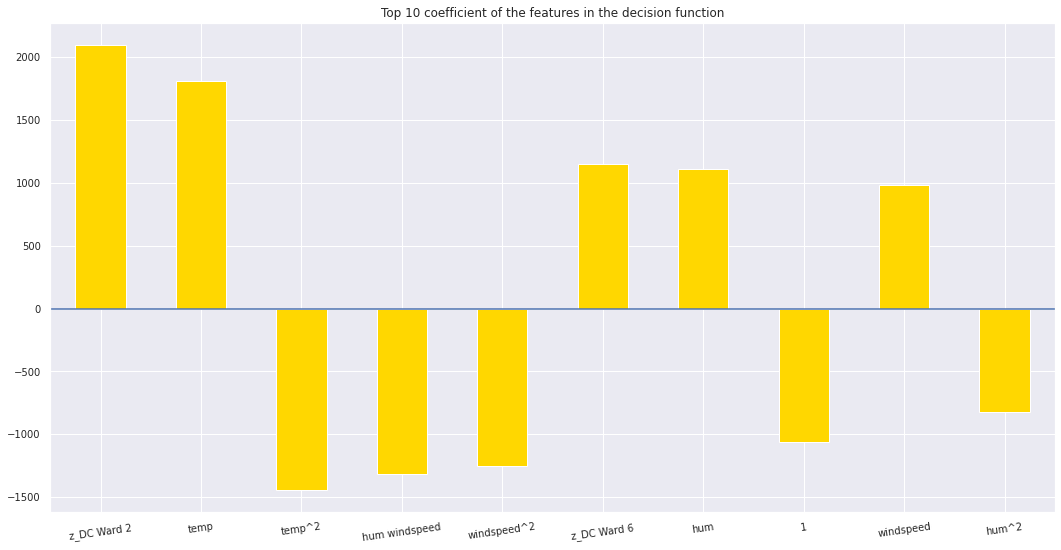

In [ ]:
sns.set()
coeff_ordering = est2.params.abs().sort_values(ascending=False)
top_n = 10
coeff_ordering = coeff_ordering.iloc[:top_n]
est2.params[coeff_ordering.index].plot(
    title="Top 10 coefficient of the features in the decision function",
    x="columns",
    fontsize=10,
    rot=8,
    y="importance",
    kind="bar",
    color="gold",
)
plt.axhline(y=0, color="b", linestyle="-")
plt.show()

#Ridge

We have decided to penalize regression coefficients with the L2 norm, forcing them to be smaller

Let's tune our hyperparameters using a RandomizedSearchCV with the purpose of minimizing the MSE, passing as parameter **alpha** and **solver**.

In [ ]:
model = Ridge()

# define evaluation
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=420)

# define search space
space = dict()
space['solver'] = ['svd', 'cholesky', 'lsqr', 'sag']
#space['alpha'] = loguniform(1e-5, 100)
space['alpha'] = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

search = RandomizedSearchCV(model, space, n_iter=20, scoring='neg_mean_squared_error', n_jobs=-1, cv=cv, random_state=420)
result = search.fit(complete, y)

# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: -86213.59455664051

Best Hyperparameters: {'solver': 'cholesky', 'alpha': 0.1}

Then we have fitted the model with best parameters returned by our previous RandomizedSearchCV. We used the same input as the previous non linear regression (*\"quadratic partial\"*), in order to easily compare the results.

In [ ]:
ridge = Ridge(solver='cholesky', alpha=0.1, fit_intercept=True)
ridge.fit(complete, y)
print('Coefficients: \n', round(pd.Series(ridge.coef_), 4))
print('Intercept: \n', ridge.intercept_)

Coefficients: 
 0        0.0000
1      105.0074
2      -51.7847
3       12.5620
4     1564.2135
5      855.8191
6      409.4461
7      105.0074
8      -52.9796
9        7.8588
10     125.3084
11    -124.3653
12    -107.3229
13     -51.7847
14     -39.2024
15     257.4280
16     -82.1065
17     409.3601
18      -1.5840
19      -0.9603
20      -6.8928
21      22.8639
22   -1336.5359
23     191.2558
24     180.7129
25    -729.4188
26    -919.3112
27    -732.2710
28     162.6453
29     189.7116
30     789.2259
31    2087.4371
32     185.2485
33     123.1032
34     162.9767
35    1143.6861
36      70.8503
37      52.2593
38     103.3920
39     119.5803
40     130.2018
41     -35.6985
42    -136.5518
dtype: float64

Intercept: 
 -898.7983512195078

In [ ]:
y_pred = ridge.predict(complete_test)
table.add_row(
    f"{complete_test.shape[1]}",
    "Ridge, best",
    f"{r2_score(y_test, y_pred):.3f}",
    f"{mean_squared_error(y_test, y_pred):.1f}",
)
console.print(table)

            Evaluation metrics on test set            
┏━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━┓
┃ n_cols ┃ Method                  ┃    R² ┃     MSE ┃
┡━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━┩
│     25 │ Linear, complete        │ 0.842 │ 87388.0 │
│     22 │ Linear, partial         │ 0.842 │ 87384.4 │
│     43 │ Quadratic, partial      │ 0.843 │ 86463.9 │
│     30 │ Quadratic, superpartial │ 0.834 │ 84858.3 │
│     43 │ Ridge, best             │ 0.843 │ 86476.1 │
└────────┴─────────────────────────┴───────┴─────────┘
MSE: Mean squared error                               

We want to analyze the coefficients we obtained plotting both regressions coefficients, in order to check how coefficients distribution is been penalized from our L2 norm method.

In [ ]:
coef = round(pd.Series(ridge.coef_), 4)
coef2 = round(pd.Series(est2.params), 4)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



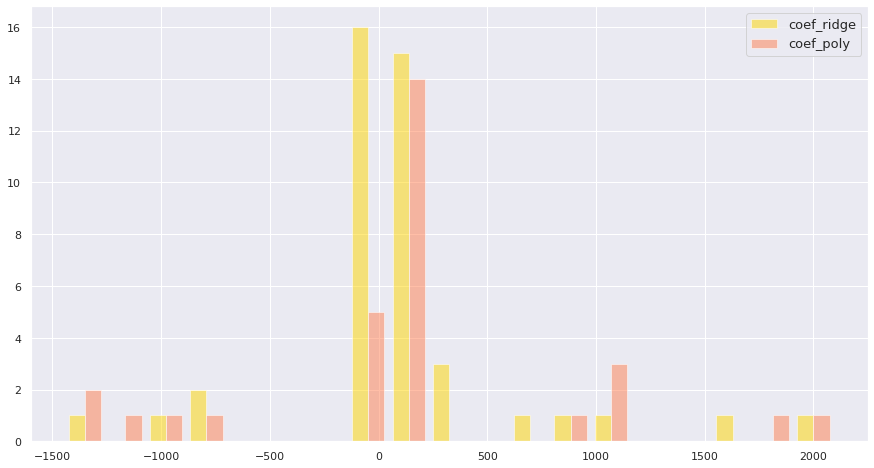

In [ ]:
bins =  np.linspace(coef2.min(), coef2.max(), 20)
plt.rcParams["figure.figsize"] = (15, 8)
plt.hist([coef,coef2], bins, alpha=0.5, label=['coef_ridge','coef_poly'],color= ['gold','coral'])
plt.legend(loc='upper right',prop={'size': 13})
plt.show()

Ridge penalization reduced the absolute value of previous coefficients. As we expected we can notice that coefficients from ridge results are closer to zero respect to the non linear one. 

# DT & RF Regressions

### Importing our dataset

Like we usually do, we import our dataframe from the custom interface Bikes,this time we decide to use geo_df_SD which has a dummied season column and all the single geographic zone.

In [ ]:
d = Bikes(val=False)
df = d.geo_df_SD

In [ ]:
df.head()

,dteday,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,autumn,z_Arlington 1,z_Arlington 2,z_DC Ward 1,z_DC Ward 2,z_DC Ward 3,z_DC Ward 4,z_DC Ward 5,z_DC Ward 6,z_DC Ward 7,z_DC Ward 8,w_cloudy,w_rain,season
0,2011-01-01,0,1,0,6,0,0.344167,0.363625,0.805833,0.160446,41,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1
1,2011-01-01,0,1,0,6,0,0.344167,0.363625,0.805833,0.160446,241,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1
2,2011-01-01,0,1,0,6,0,0.344167,0.363625,0.805833,0.160446,410,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1
3,2011-01-01,0,1,0,6,0,0.344167,0.363625,0.805833,0.160446,22,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1
4,2011-01-01,0,1,0,6,0,0.344167,0.363625,0.805833,0.160446,25,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7273 entries, 0 to 7272
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   dteday         7273 non-null   datetime64[ns]
 1   yr             7273 non-null   int64         
 2   mnth           7273 non-null   int64         
 3   holiday        7273 non-null   int64         
 4   weekday        7273 non-null   int64         
 5   workingday     7273 non-null   int64         
 6   temp           7273 non-null   float64       
 7   atemp          7273 non-null   float64       
 8   hum            7273 non-null   float64       
 9   windspeed      7273 non-null   float64       
 10  cnt            7273 non-null   int64         
 11  spring         7273 non-null   uint8         
 12  summer         7273 non-null   uint8         
 13  autumn         7273 non-null   uint8         
 14  z_Arlington 1  7273 non-null   uint8         
 15  z_Arlington 2  7273 n

### Train-test split


 We decide to use the same division of the first regression part in order to have a comparable result.

In [ ]:
X_train= d.d['x_train'].values
y_train= d.d['y_train']
X_test= d.d['x_test'].values
y_test= d.d['y_test']

In [ ]:
X_train

array([[Timestamp('2011-01-01 00:00:00'), 0, 1, ..., 0, 1, 0],
       [Timestamp('2011-01-01 00:00:00'), 0, 1, ..., 0, 1, 0],
       [Timestamp('2011-01-01 00:00:00'), 0, 1, ..., 0, 1, 0],
       ...,
       [Timestamp('2012-12-31 00:00:00'), 1, 12, ..., 0, 1, 0],
       [Timestamp('2012-12-31 00:00:00'), 1, 12, ..., 0, 1, 0],
       [Timestamp('2012-12-31 00:00:00'), 1, 12, ..., 1, 1, 0]],
      dtype=object)

In [ ]:
X_train = np.delete(X_train, 0, axis=1)
X_test = np.delete(X_test, 0, axis=1)
X_train.shape

(6182, 24)

In [ ]:
X_train

array([[0, 1, 0, ..., 0, 1, 0],
       [0, 1, 0, ..., 0, 1, 0],
       [0, 1, 0, ..., 0, 1, 0],
       ...,
       [1, 12, 0, ..., 0, 1, 0],
       [1, 12, 0, ..., 0, 1, 0],
       [1, 12, 0, ..., 1, 1, 0]], dtype=object)

Now we define a custom report function that is gonna be useful when we have to compare the results from the RandomSearch.

In [ ]:
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

##Decision Tree Regressor

We first try to solve the regression task using a Decision Tree Regressor, useful for showing how this model works by plotting it.

In [ ]:
DT_reg= DecisionTreeRegressor(criterion='squared_error', max_depth=3, min_samples_split=30, min_samples_leaf=30, max_features='auto', random_state=0)

In [ ]:
DT_reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3, max_features='auto', min_samples_leaf=30,
                      min_samples_split=30, random_state=0)

In [ ]:
y_pred= DT_reg.predict(X_train)

In [ ]:
print('MSE: ', mean_squared_error(y_train, y_pred))
print('R2: ', r2_score(y_train, y_pred))

MSE:  53182.56219192073

R2:  0.8959917970306088

So we ran a RandomSearchCV with scoring 'neg_mean_squared_error' which is the MSE with negative sign. This because the random search try to find the hyperparameters that maximize the score while we want to minimize the MSE.

We set the number of iteration to 30 and 5 fold of Cross Validation in order to get a more reliable evaluation.

Below are showed the parameters tried. We first try an high range of values and then switch to a smaller range in the subsequent GridSearchCV, also keeping in mind the RandomSearch best results.

In [ ]:
param_grid = {
   'max_features': ['auto'],
   'max_depth' : [10, 20, 30, 40, 50],
   'min_samples_split': [10, 20, 30, 40, 50, 100],
   'min_samples_leaf': [10, 20, 30, 40, 100],
   'criterion' :['squared_error']
}

In [ ]:
sorted(SCORERS.keys())[20:40]

[
    'mutual_info_score',
    'neg_brier_score',
    'neg_log_loss',
    'neg_mean_absolute_error',
    'neg_mean_absolute_percentage_error',
    'neg_mean_gamma_deviance',
    'neg_mean_poisson_deviance',
    'neg_mean_squared_error',
    'neg_mean_squared_log_error',
    'neg_median_absolute_error',
    'neg_root_mean_squared_error',
    'normalized_mutual_info_score',
    'precision',
    'precision_macro',
    'precision_micro',
    'precision_samples',
    'precision_weighted',
    'r2',
    'rand_score',
    'recall'
]

In [ ]:
random_search = RandomizedSearchCV(DecisionTreeRegressor(random_state=0), scoring='neg_mean_squared_error', param_distributions=param_grid, n_iter=30, cv=5, random_state=0)
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=0),
                   n_iter=30,
                   param_distributions={'criterion': ['squared_error'],
                                        'max_depth': [10, 20, 30, 40, 50],
                                        'max_features': ['auto'],
                                        'min_samples_leaf': [10, 20, 30, 40,
                                                             100],
                                        'min_samples_split': [10, 20, 30, 40,
                                                              50, 100]},
                   random_state=0, scoring='neg_mean_squared_error')

In [ ]:
report(random_search.cv_results_,5)

Model with rank: 1

Mean validation score: -46624.438 (std: 12544.846)

Parameters: {'min_samples_split': 20, 'min_samples_leaf': 20, 'max_features': 'auto', 
'max_depth': 10, 'criterion': 'squared_error'}

Model with rank: 1

Mean validation score: -46624.438 (std: 12544.846)

Parameters: {'min_samples_split': 30, 'min_samples_leaf': 20, 'max_features': 'auto', 
'max_depth': 10, 'criterion': 'squared_error'}

Model with rank: 3

Mean validation score: -46720.126 (std: 12430.536)

Parameters: {'min_samples_split': 20, 'min_samples_leaf': 20, 'max_features': 'auto', 
'max_depth': 20, 'criterion': 'squared_error'}

Model with rank: 3

Mean validation score: -46720.126 (std: 12430.536)

Parameters: {'min_samples_split': 10, 'min_samples_leaf': 20, 'max_features': 'auto', 
'max_depth': 30, 'criterion': 'squared_error'}

Model with rank: 3

Mean validation score: -46720.126 (std: 12430.536)

Parameters: {'min_samples_split': 10, 'min_samples_leaf': 20, 'max_features': 'auto', 
'max_depth': 50, 'criterion': 'squared_error'}

Model with rank: 3

Mean validation score: -46720.126 (std: 12430.536)

Parameters: {'min_samples_split': 20, 'min_samples_leaf': 20, 'max_features': 'auto', 
'max_depth': 40, 'criterion': 'squared_error'}

In [ ]:
param_grid = {
   'max_features': ['auto'],
   'max_depth' : [30, 35, 40, 45, 50],
   'min_samples_split': [10, 20, 30, 40],
   'min_samples_leaf': [10, 15, 20, 25, 30],
   'criterion' :['squared_error']
}

In [ ]:
grid_search = GridSearchCV(DecisionTreeRegressor(random_state=0), scoring='neg_mean_squared_error', param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'criterion': ['squared_error'],
                         'max_depth': [30, 35, 40, 45, 50],
                         'max_features': ['auto'],
                         'min_samples_leaf': [10, 15, 20, 25, 30],
                         'min_samples_split': [10, 20, 30, 40]},
             scoring='neg_mean_squared_error')

In [ ]:
report(grid_search.cv_results_,5)

Model with rank: 1

Mean validation score: -43957.859 (std: 10669.123)

Parameters: {'criterion': 'squared_error', 'max_depth': 30, 'max_features': 'auto', 
'min_samples_leaf': 15, 'min_samples_split': 10}

Model with rank: 1

Mean validation score: -43957.859 (std: 10669.123)

Parameters: {'criterion': 'squared_error', 'max_depth': 30, 'max_features': 'auto', 
'min_samples_leaf': 15, 'min_samples_split': 20}

Model with rank: 1

Mean validation score: -43957.859 (std: 10669.123)

Parameters: {'criterion': 'squared_error', 'max_depth': 30, 'max_features': 'auto', 
'min_samples_leaf': 15, 'min_samples_split': 30}

Model with rank: 1

Mean validation score: -43957.859 (std: 10669.123)

Parameters: {'criterion': 'squared_error', 'max_depth': 35, 'max_features': 'auto', 
'min_samples_leaf': 15, 'min_samples_split': 10}

Model with rank: 1

Mean validation score: -43957.859 (std: 10669.123)

Parameters: {'criterion': 'squared_error', 'max_depth': 35, 'max_features': 'auto', 
'min_samples_leaf': 15, 'min_samples_split': 20}

Model with rank: 1

Mean validation score: -43957.859 (std: 10669.123)

Parameters: {'criterion': 'squared_error', 'max_depth': 35, 'max_features': 'auto', 
'min_samples_leaf': 15, 'min_samples_split': 30}

Model with rank: 1

Mean validation score: -43957.859 (std: 10669.123)

Parameters: {'criterion': 'squared_error', 'max_depth': 40, 'max_features': 'auto', 
'min_samples_leaf': 15, 'min_samples_split': 10}

Model with rank: 1

Mean validation score: -43957.859 (std: 10669.123)

Parameters: {'criterion': 'squared_error', 'max_depth': 40, 'max_features': 'auto', 
'min_samples_leaf': 15, 'min_samples_split': 20}

Model with rank: 1

Mean validation score: -43957.859 (std: 10669.123)

Parameters: {'criterion': 'squared_error', 'max_depth': 40, 'max_features': 'auto', 
'min_samples_leaf': 15, 'min_samples_split': 30}

Model with rank: 1

Mean validation score: -43957.859 (std: 10669.123)

Parameters: {'criterion': 'squared_error', 'max_depth': 45, 'max_features': 'auto', 
'min_samples_leaf': 15, 'min_samples_split': 10}

Model with rank: 1

Mean validation score: -43957.859 (std: 10669.123)

Parameters: {'criterion': 'squared_error', 'max_depth': 45, 'max_features': 'auto', 
'min_samples_leaf': 15, 'min_samples_split': 20}

Model with rank: 1

Mean validation score: -43957.859 (std: 10669.123)

Parameters: {'criterion': 'squared_error', 'max_depth': 45, 'max_features': 'auto', 
'min_samples_leaf': 15, 'min_samples_split': 30}

Model with rank: 1

Mean validation score: -43957.859 (std: 10669.123)

Parameters: {'criterion': 'squared_error', 'max_depth': 50, 'max_features': 'auto', 
'min_samples_leaf': 15, 'min_samples_split': 10}

Model with rank: 1

Mean validation score: -43957.859 (std: 10669.123)

Parameters: {'criterion': 'squared_error', 'max_depth': 50, 'max_features': 'auto', 
'min_samples_leaf': 15, 'min_samples_split': 20}

Model with rank: 1

Mean validation score: -43957.859 (std: 10669.123)

Parameters: {'criterion': 'squared_error', 'max_depth': 50, 'max_features': 'auto', 
'min_samples_leaf': 15, 'min_samples_split': 30}

Then we took the best estimator and fit it to the training set

In [ ]:
DT_reg= DecisionTreeRegressor(criterion='squared_error', max_depth=30, min_samples_split=10, min_samples_leaf=15, max_features='auto', random_state=0)

In [ ]:
DT_reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=30, max_features='auto', min_samples_leaf=15,
                      min_samples_split=10, random_state=0)

Train set scoring:

In [ ]:
y_pred_train= DT_reg.predict(X_train)
print('MSE: ', mean_squared_error(y_train, y_pred_train))
print('R2: ', r2_score(y_train, y_pred_train))

MSE:  17982.80616632761

R2:  0.9648313417665545

In [ ]:
y_pred = DT_reg.predict(X_test) 
table.add_row(
    f"{X_test.shape[1]}",
    "Decision Tree Regressor, best",
    f"{r2_score(y_test.astype(float), y_pred):.3f}",
    f"{mean_squared_error(y_test.astype(float), y_pred):.1f}",
)
console.print(table)

               Evaluation metrics on test set               
┏━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━┓
┃ n_cols ┃ Method                        ┃    R² ┃     MSE ┃
┡━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━┩
│     25 │ Linear, complete              │ 0.842 │ 87388.0 │
│     22 │ Linear, partial               │ 0.842 │ 87384.4 │
│     43 │ Quadratic, partial            │ 0.843 │ 86463.9 │
│     30 │ Quadratic, superpartial       │ 0.834 │ 84858.3 │
│     43 │ Ridge, best                   │ 0.843 │ 86476.1 │
│     24 │ Decision Tree Regressor, best │ 0.952 │ 26468.2 │
└────────┴───────────────────────────────┴───────┴─────────┘
MSE: Mean squared error                                     

In the tree below are showed the first three level of the DT obtained.
As you can see root and left children are zone so this means that the target variable (cnt) is strongly dependent from them. Furthermore the right subtree which refers to DC Ward 2 has a predicted value higher then the left one, this because the Ward 2 is in Washington center which is full of station and has an high bikes usage.

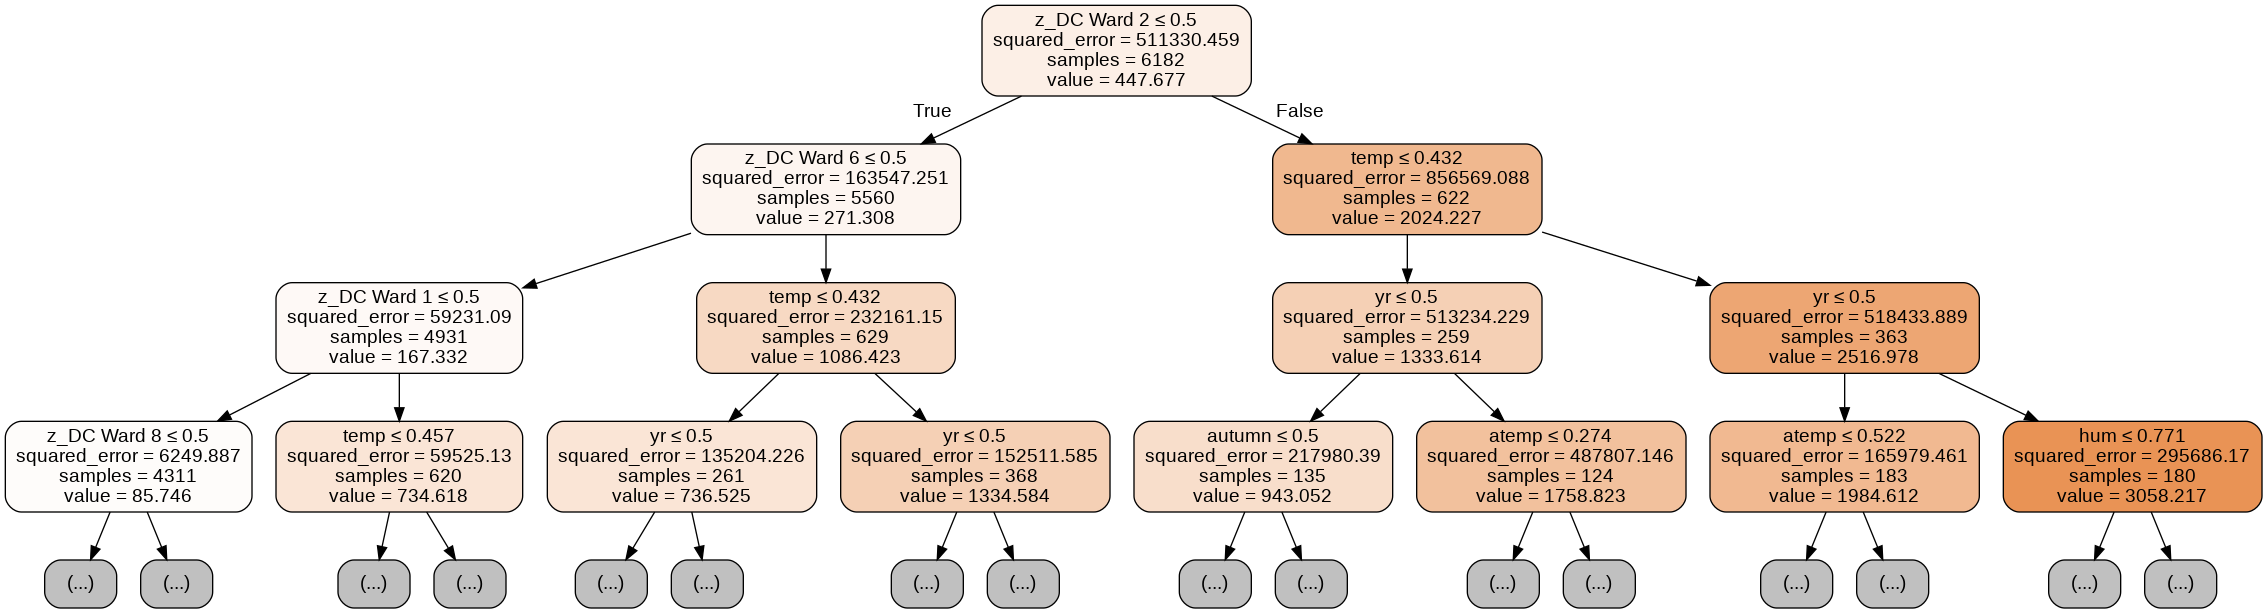

In [ ]:
dot_data = tree.export_graphviz(DT_reg, out_file=None,
                                feature_names=[a for a in df.columns if a not in ('season','dteday','cnt')],
                                filled=True, rounded=True,  
                                special_characters=True,
                                max_depth=3)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

##Random Forest Regressor

In this section we trained a RandomForest regressor for trying 
to try to have better results than a single tree.
At the start we first train a dumb model with the criterion mse, a max depth of the tree 2 and 100 estimators.

In [ ]:
RF_reg = RandomForestRegressor(criterion='squared_error', max_depth=2, random_state=0)

In [ ]:
RF_reg.fit(X_train, y_train)

RandomForestRegressor(max_depth=2, random_state=0)

We apply the model and make prediction

In [ ]:
# Apply on the training set
Y_pred = RF_reg.predict(X_train)

In [ ]:
#Apply on the test set
y_pred = RF_reg.predict(X_test)

In [ ]:
print('MSE: ', mean_squared_error(y_test, y_pred))
print('R2: ', r2_score(y_test, y_pred))

MSE:  114351.00977775692

R2:  0.7928279033971858

At this point, like we do for the Decision Tree Regressor we first try to do a general Random Search with a larger value range of the parameter and after we do a Grid Search more restrictive relying on the best parameters that came out of the top 5 models of the Random Search. 

Of course we do a 5 fold of Cross Validation with 30 iterations and we use the 'neg_mean_squared_error'.This because the random search try to find the hyperparameters that maximize the score while we want to minimize the MSE.


In [ ]:
param_grid = {
   'n_estimators': [50, 100, 200, 300],
   'max_features': ['auto','sqrt', 'log2'],
   'max_depth' : [5, 10, 20, 30, 40],
   'min_samples_split': [10, 20, 40, 60, 80, 100],
   'min_samples_leaf': [10, 20, 40, 60, 80, 100],
   'criterion' :['squared_error']
}

In [ ]:
random_search = RandomizedSearchCV(RandomForestRegressor(random_state=0), scoring='neg_mean_squared_error', param_distributions=param_grid, n_iter=30, cv=5, random_state=0)
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=0),
                   n_iter=30,
                   param_distributions={'criterion': ['squared_error'],
                                        'max_depth': [5, 10, 20, 30, 40],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [10, 20, 40, 60, 80,
                                                             100],
                                        'min_samples_split': [10, 20, 40, 60,
                                                              80, 100],
                                        'n_estimators': [50, 100, 200, 300]},
                   random_state=0, scoring='neg_mean_squared_error')

In [ ]:
report(random_search.cv_results_, 5)

Model with rank: 1

Mean validation score: -41359.721 (std: 13544.840)

Parameters: {'n_estimators': 300, 'min_samples_split': 40, 'min_samples_leaf': 20, 
'max_features': 'auto', 'max_depth': 20, 'criterion': 'squared_error'}

Model with rank: 2

Mean validation score: -47128.053 (std: 15208.981)

Parameters: {'n_estimators': 300, 'min_samples_split': 60, 'min_samples_leaf': 20, 
'max_features': 'auto', 'max_depth': 5, 'criterion': 'squared_error'}

Model with rank: 3

Mean validation score: -63254.790 (std: 15430.361)

Parameters: {'n_estimators': 300, 'min_samples_split': 40, 'min_samples_leaf': 40, 
'max_features': 'auto', 'max_depth': 20, 'criterion': 'squared_error'}

Model with rank: 4

Mean validation score: -69412.144 (std: 33054.921)

Parameters: {'n_estimators': 100, 'min_samples_split': 40, 'min_samples_leaf': 10, 
'max_features': 'sqrt', 'max_depth': 40, 'criterion': 'squared_error'}

Model with rank: 5

Mean validation score: -69681.186 (std: 35441.895)

Parameters: {'n_estimators': 100, 'min_samples_split': 60, 'min_samples_leaf': 10, 
'max_features': 'sqrt', 'max_depth': 30, 'criterion': 'squared_error'}

Now we chose the relative parameters for the GridSearch

In [ ]:
param_grid = {
   'n_estimators': [250, 300, 350],
   'max_features': ['auto'],
   'max_depth' : [5, 10, 15, 20, 25],
   'min_samples_split': [30, 40, 50, 60],
   'min_samples_leaf': [10, 20, 30, 40],
   'criterion' :['squared_error']
}

###### Intensive grid search

In [ ]:
grid_search = GridSearchCV(RandomForestRegressor(random_state=0), scoring='neg_mean_squared_error', param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=0),
             param_grid={'criterion': ['squared_error'], 'max_depth': [20],
                         'max_features': ['auto'], 'min_samples_leaf': [10],
                         'min_samples_split': [30],
                         'n_estimators': [250, 300, 350]},
             scoring='neg_mean_squared_error')

In [ ]:
report(grid_search.cv_results_, 5)

Model with rank: 1

Mean validation score: -36754.146 (std: 11548.506)

Parameters: {'criterion': 'squared_error', 'max_depth': 20, 'max_features': 'auto', 
'min_samples_leaf': 10, 'min_samples_split': 30, 'n_estimators': 250}

Model with rank: 2

Mean validation score: -36792.061 (std: 11628.237)

Parameters: {'criterion': 'squared_error', 'max_depth': 20, 'max_features': 'auto', 
'min_samples_leaf': 10, 'min_samples_split': 30, 'n_estimators': 300}

Model with rank: 3

Mean validation score: -36875.521 (std: 11675.202)

Parameters: {'criterion': 'squared_error', 'max_depth': 20, 'max_features': 'auto', 
'min_samples_leaf': 10, 'min_samples_split': 30, 'n_estimators': 350}

###### Best RFR
At this point we use the best model to make the predictions, both on the train set and on the test set.

In [ ]:
RF_reg = RandomForestRegressor(criterion='squared_error', n_estimators=250, max_depth=20, max_features='auto', min_samples_leaf=10, min_samples_split=30)

In [ ]:
RF_reg.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, min_samples_leaf=10, min_samples_split=30,
                      n_estimators=250)

In [ ]:
y_pred_train= RF_reg.predict(X_train)
print('MSE: ', mean_squared_error(y_train, y_pred_train))
print('R2: ', r2_score(y_train, y_pred_train))

MSE:  15388.581276277033

R2:  0.9699048218282883

In [ ]:
y_pred = RF_reg.predict(X_test) 
table.add_row(
    f"{X_test.shape[1]}",
    "Random Forest Regressor, best",
    f"{r2_score(y_test.astype(float), y_pred):.3f}",
    f"{mean_squared_error(y_test.astype(float), y_pred):.1f}",
)
console.print(table)

               Evaluation metrics on test set               
┏━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━┓
┃ n_cols ┃ Method                        ┃    R² ┃     MSE ┃
┡━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━┩
│     25 │ Linear, complete              │ 0.842 │ 87388.0 │
│     22 │ Linear, partial               │ 0.842 │ 87384.4 │
│     43 │ Quadratic, partial            │ 0.843 │ 86463.9 │
│     30 │ Quadratic, superpartial       │ 0.834 │ 84858.3 │
│     43 │ Ridge, best                   │ 0.843 │ 86476.1 │
│     24 │ Decision Tree Regressor, best │ 0.952 │ 26468.2 │
│     24 │ Random Forest Regressor, best │ 0.964 │ 19648.6 │
└────────┴───────────────────────────────┴───────┴─────────┘
MSE: Mean squared error                                     

# Conclusions

The linear regression has a fairly acceptable $R^2$, particularly given that in the partial we only have 21 features. The quadratic regression had disappointing metrics: $R^2$ and MSE themselves do not suggest that quadratic gave us any improvement over linear; however, the significance values of quadratic and interaction regressors might give us interesting insights in the explanation phase. Also, we did find quadratic regressors of high significance in the temp, humidity and windspeed variables, indicating that quadratic regression has value.

Ridge does not give us any consistent benefits either: we suppose it’s because we had too few regressors (43 regressors in complete) to fully exploit Ridge’s strengths of regularization.

The Decision Tree Regressor instead , is not a bad model , but it doesn't have the good performance of the Random Forest. But thanks to him we can observe immediately what is the first most important split and understand well  that the zones are immediately separated into whostington ward and not, after that the not ward part is divided based on  the year value and the ward part is splitted based on the temperature value and so on.

Like we said before,  the Random Forest Regression model returned the highest $R^2$ value with the lowest MSE metric and for that now we can say that is our best model. In the next midterm we will try to demonstrate it.

**Thank you for the attention.**

# New granularity

In our previous work Washington DC has been divided using 3 geojson files from **Open Data DC** with some refinement about *Arlington* obtaining 11 zones. Those zones are still really large and results are difficult to interpret for the policy maker. In order to make more usefull our results we tried to increment the number of Washington DC zones using an algorithm clustering

In [74]:
geo_df= read_geodf('/content/drive/Shareddrives/BigData_project/data/stations.csv')

/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [75]:
geo_df.head()

,station,number,lat,long,geometry
0,5th & F St NW,31620,38.897222,-77.019347,POINT (-77.01935 38.89722)
1,14th & Harvard St NW,31105,38.926800,-77.032200,POINT (-77.03220 38.92680)
2,Georgia & New Hampshire Ave NW,31400,38.936043,-77.024649,POINT (-77.02465 38.93604)
3,10th & U St NW,31111,38.917200,-77.025900,POINT (-77.02590 38.91720)
4,Adams Mill & Columbia Rd NW,31104,38.922925,-77.042581,POINT (-77.04258 38.92292)


## Kmeans

In order to find more zone we made a clustering with Kmeans on a 2D plane with the coordinates

In [76]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [77]:
geo_df['geometry']

<matplotlib.collections.PathCollection object at 0x7fcb0b507250>

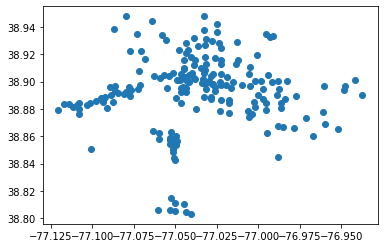

In [78]:
plt.scatter(geo_df['long'],geo_df['lat'])

In [79]:
sse_list = list()
sil_list= list()
max_k = 30
for k in range(2, max_k + 1):
    kmeans = KMeans(n_clusters=k, n_init=20, max_iter=100, random_state=0)
    kmeans.fit(geo_df[['long','lat']].values)
    
    sil_list.append(silhouette_score(geo_df[['long','lat']],kmeans.labels_))
    sse = kmeans.inertia_
    sse_list.append(sse)

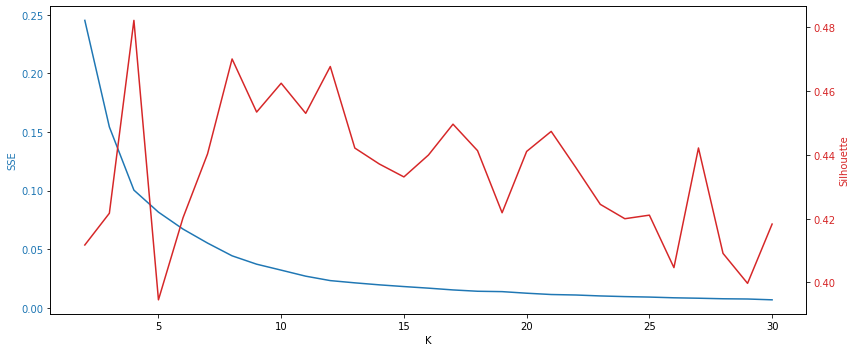

In [80]:
fig, ax1 = plt.subplots(figsize=(12, 5))
t = np.arange(2, 31, 1)
color = 'tab:blue'
ax1.set_xlabel('K')
ax1.set_ylabel('SSE', color=color)
ax1.plot(t, sse_list, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:red'
ax2.set_ylabel('Silhouette', color=color)
ax2.plot(t, sil_list, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()

We choose k=21 looking at SSE and Silhouette. As you can see the SSE knee is in the range (5,10) where we also find a pretty good Silhouette. But we are interested in an higher number of zone so we choose a pik in Silhouette near 20.

In [81]:
kmeans= KMeans(n_clusters=21, n_init=20, max_iter=100, random_state=0)

In [82]:
kmeans.fit(geo_df[['long','lat']].values)

KMeans(max_iter=100, n_clusters=21, n_init=20, random_state=0)

In [83]:
kmeans.labels_

array([ 0, 11, 11, 16,  4, 18,  0,  4,  8,  3,  4, 10, 18,  4, 16,  8,  4,
        7,  8,  0,  4, 18, 16, 10,  7, 11, 10,  3, 10, 11, 10, 10, 11,  1,
        7,  4,  3,  4,  4,  4, 11,  1, 13, 13,  1,  0,  3, 10,  3,  0,  0,
        8, 11,  7, 10,  1, 14, 11,  3,  3,  0, 13,  3,  8, 18, 13, 19, 19,
        0, 19,  3,  7,  0,  7,  4, 15, 10, 10,  0, 10,  3, 19, 16,  3, 18,
        0,  8, 14,  3,  3, 16, 18, 10,  1,  1, 15, 14, 12,  9, 12,  9,  9,
       12,  0,  3, 15,  3,  0,  2,  2,  2,  2,  0, 10,  0,  0,  0, 15, 15,
       10,  2, 17,  4, 10,  0, 17, 17, 10, 16, 18, 17, 13, 16, 11, 11,  7,
        7,  4, 19,  8, 12, 12,  1,  9, 13, 18,  8, 10, 16,  6,  6,  7, 17,
       10, 13, 13,  2,  2,  2,  2,  2, 20, 17,  6,  6,  6,  6, 17, 13,  9,
        6,  6, 17, 10,  0, 10, 10,  0, 10,  7,  0, 10,  6,  5,  5,  5,  5,
        5,  5,  5,  5,  2, 17, 10], dtype=int32)

<matplotlib.collections.PathCollection object at 0x7fcb0cd10b90>

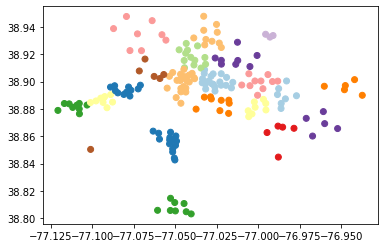

In [84]:
plt.scatter(geo_df['long'],geo_df['lat'],c=kmeans.labels_, cmap='Paired')

In [85]:
!pip install -U geovoronoi

     |████████████████████████████████| 1.0 MB 8.3 MB/s 
     |████████████████████████████████| 27.4 MB 1.2 MB/s 
  Attempting uninstall: shapely
    Found existing installation: Shapely 1.8.0
    Uninstalling Shapely-1.8.0:
      Successfully uninstalled Shapely-1.8.0
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [86]:
from scipy.spatial import Voronoi,voronoi_plot_2d
from geovoronoi import voronoi_regions_from_coords, points_to_coords

Now that we have 21 cluster we take the centroid and draw the voronoi region around it 

In [87]:
kmeans.cluster_centers_

array([[-77.02651795,  38.90002119],
       [-76.98451843,  38.88956086],
       [-77.08017073,  38.89376697],
       [-77.05326709,  38.85534457],
       [-77.03988546,  38.91783   ],
       [-77.04936425,  38.80766825],
       [-77.11101367,  38.88147733],
       [-76.9991823 ,  38.8990988 ],
       [-77.07054838,  38.93444425],
       [-76.9868274 ,  38.8614296 ],
       [-77.04540979,  38.89963992],
       [-77.0291329 ,  38.9335137 ],
       [-76.9469294 ,  38.8957854 ],
       [-77.02500033,  38.88405944],
       [-76.993135  ,  38.933594  ],
       [-76.9621836 ,  38.8691894 ],
       [-77.01426238,  38.9165285 ],
       [-77.093396  ,  38.88625622],
       [-77.00087937,  38.88070587],
       [-77.0637296 ,  38.90705584],
       [-77.100989  ,  38.850337  ]])

In [88]:
vor= Voronoi(kmeans.cluster_centers_, qhull_options='Qbb Qc Qx')

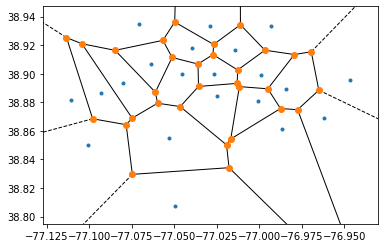

In [89]:
fig = voronoi_plot_2d(vor)
plt.show()

In [90]:
poly= partition.at[0,'geometry']
for p in partition['geometry']:
  poly= poly.union(p)

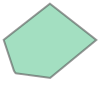

In [91]:
poly.convex_hull

In [92]:
x= poly.convex_hull.exterior.coords.xy[0]
y= poly.convex_hull.exterior.coords.xy[1]

Intersect it with a convex hull of the city, in order to obtain the lateral region finite

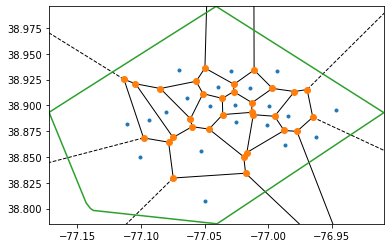

In [93]:
voronoi_plot_2d(vor)
plt.plot(x,y)
plt.xlim(min(x),max(x))
plt.ylim(min(y),max(y))
plt.show()

In [94]:
region_polys, region_pts = voronoi_regions_from_coords(kmeans.cluster_centers_, poly.convex_hull)

/usr/local/lib/python3.7/dist-packages/geovoronoi/_voronoi.py:143: ShapelyDeprecationWarning: The proxy geometries (through the 'asShape()', 'asPoint()' or 'PointAdapter()' constructors) are deprecated and will be removed in Shapely 2.0. Use the 'shape()' function or the standard 'Point()' constructor instead.
  pts = coords_to_points(coords)
/usr/local/lib/python3.7/dist-packages/geovoronoi/_voronoi.py:202: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  geom_polys, geom_pts = region_polygons_from_voronoi(vor, geom, return_point_assignments=True, **kwargs)
Exception ignored in: <function BaseGeometry.__del__ at 0x7fcb4af96290>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/shapely/geometry/base.py", line 209, in __del__
    #     case of a multipart geometry member.
  File "/usr/local/lib/python3.7/dist-packages/shapely/geometry/base.py", line 199, 

In [95]:
name=[]
for i in range(1,22):
  name.append('Zone '+str(i))

In [96]:
partition_new= pd.DataFrame(columns=['name','geometry'])

In [97]:
partition_new['name']=name

In [98]:
for index, row in partition_new.iterrows():
  partition_new.at[index,'geometry']=region_polys[index]

In [99]:
crs = {'init': 'epsg:4326'}
partition_new = gpd.GeoDataFrame(partition_new, crs=crs, geometry=partition_new['geometry'])

/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [100]:
geo_df= geo_df.sjoin(partition_new, how='inner', predicate='intersects')

In [101]:
geo_df.rename(columns={'name':'station zone'}, inplace=True)

In [102]:
geo_df.sort_index(inplace=True)

In [103]:
m = folium.Map(location=[geo_df['lat'].mean(), geo_df['long'].mean()],
               tiles='OpenStreetMap',
               zoom_start=13,
              )
clr=['red', 'blue', 'green', 'purple', 'orange', 'darkred',
'lightred', 'beige', 'darkblue', 'darkgreen', 'cadetblue', 'darkpurple', 'white', 'pink', 'lightblue', 'lightgreen', 
'gray', 'black', 'lightgray', 'darkblue', 'green']

for zn,c in zip(partition_new['name'],clr):
    for index,row in geo_df[geo_df['station zone']==zn].iterrows():
        name= row['station']

        folium.Marker(
            location= [row['geometry'].centroid.y,row['geometry'].centroid.x],
            popup= '<b>%s</b>'%(name),
            icon= folium.Icon(color=c, icon='map-marker')
        ).add_to(m)
        
for (_, r), c in zip(partition_new.iterrows(),clr):
    sim_geo = gpd.GeoSeries(r['geometry']).simplify(tolerance=0.001)
    geo_j = sim_geo.to_json()
    geo_j = folium.GeoJson(data=geo_j)
    folium.Popup(r['name']).add_to(geo_j)
    geo_j.add_to(m)
m

Make this Notebook Trusted to load map: File -> Trust Notebook <iframe src="about:blank" style="position:absolute;width:100%;height:100%;left:0;top:0;border:none !important;" data-html=%3C%21DOCTYPE%20html%3E%0A%3Chead%3E%20%20%20%20%0A%20%20%20%20%3Cmeta%20http-equiv%3D%22content-type%22%20content%3D%22text/html%3B%20charset%3DUTF-8%22%20/%3E%0A%20%20%20%20%3Cscript%3EL_PREFER_CANVAS%3Dfalse%3B%20L_NO_TOUCH%3Dfalse%3B%20L_DISABLE_3D%3Dfalse%3B%3C/script%3E%0A%20%20%20%20%3Cscript%20src%3D%22https%3A//cdn.jsdelivr.net/npm/leaflet%401.4.0/dist/leaflet.js%22%3E%3C/script%3E%0A%20%20%20%20%3Cscript%20src%3D%22https%3A//code.jquery.com/jquery-1.12.4.min.js%22%3E%3C/script%3E%0A%20%20%20%20%3Cscript%20src%3D%22https%3A//maxcdn.bootstrapcdn.com/bootstrap/3.2.0/js/bootstrap.min.js%22%3E%3C/script%3E%0A%20%20%20%20%3Cscript%20src%3D%22https%3A//cdnjs.cloudflare.com/ajax/libs/Leaflet.awesome-markers/2.0.2/leaflet.awesome-markers.js%22%3E%3C/script%3E%0A%20%20%20%20%3Clink%20rel%3D%22stylesheet%22%20href%3D%22https%3A//cdn.jsdelivr.net/npm/leaflet%401.4.0/dist/leaflet.css%22/%3E%0A%20%20%20%20%3Clink%20rel%3D%22stylesheet%22%20href%3D%22https%3A//maxcdn.bootstrapcdn.com/bootstrap/3.2.0/css/bootstrap.min.css%22/%3E%0A%20%20%20%20%3Clink%20rel%3D%22stylesheet%22%20href%3D%22https%3A//maxcdn.bootstrapcdn.com/bootstrap/3.2.0/css/bootstrap-theme.min.css%22/%3E%0A%20%20%20%20%3Clink%20rel%3D%22stylesheet%22%20href%3D%22https%3A//maxcdn.bootstrapcdn.com/font-awesome/4.6.3/css/font-awesome.min.css%22/%3E%0A%20%20%20%20%3Clink%20rel%3D%22stylesheet%22%20href%3D%22https%3A//cdnjs.cloudflare.com/ajax/libs/Leaflet.awesome-markers/2.0.2/leaflet.awesome-markers.css%22/%3E%0A%20%20%20%20%3Clink%20rel%3D%22stylesheet%22%20href%3D%22https%3A//rawcdn.githack.com/python-visualization/folium/master/folium/templates/leaflet.awesome.rotate.css%22/%3E%0A%20%20%20%20%3Cstyle%3Ehtml%2C%20body%20%7Bwidth%3A%20100%25%3Bheight%3A%20100%25%3Bmargin%3A%200%3Bpadding%3A%200%3B%7D%3C/style%3E%0A%20%20%20%20%3Cstyle%3E%23map%20%7Bposition%3Aabsolute%3Btop%3A0%3Bbottom%3A0%3Bright%3A0%3Bleft%3A0%3B%7D%3C/style%3E%0A%20%20%20%20%0A%20%20%20%20%3Cmeta%20name%3D%22viewport%22%20content%3D%22width%3Ddevice-width%2C%0A%20%20%20%20%20%20%20%20initial-scale%3D1.0%2C%20maximum-scale%3D1.0%2C%20user-scalable%3Dno%22%20/%3E%0A%20%20%20%20%3Cstyle%3E%23map_1cd205556e224cf89e47f2ec354e6ce9%20%7B%0A%20%20%20%20%20%20%20%20position%3A%20relative%3B%0A%20%20%20%20%20%20%20%20width%3A%20100.0%25%3B%0A%20%20%20%20%20%20%20%20height%3A%20100.0%25%3B%0A%20%20%20%20%20%20%20%20left%3A%200.0%25%3B%0A%20%20%20%20%20%20%20%20top%3A%200.0%25%3B%0A%20%20%20%20%20%20%20%20%7D%0A%20%20%20%20%3C/style%3E%0A%3C/head%3E%0A%3Cbody%3E%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%3Cdiv%20class%3D%22folium-map%22%20id%3D%22map_1cd205556e224cf89e47f2ec354e6ce9%22%20%3E%3C/div%3E%0A%3C/body%3E%0A%3Cscript%3E%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20bounds%20%3D%20null%3B%0A%20%20%20%20%0A%0A%20%20%20%20var%20map_1cd205556e224cf89e47f2ec354e6ce9%20%3D%20L.map%28%0A%20%20%20%20%20%20%20%20%27map_1cd205556e224cf89e47f2ec354e6ce9%27%2C%20%7B%0A%20%20%20%20%20%20%20%20center%3A%20%5B38.892461759793804%2C%20-77.03631318195879%5D%2C%0A%20%20%20%20%20%20%20%20zoom%3A%2013%2C%0A%20%20%20%20%20%20%20%20maxBounds%3A%20bounds%2C%0A%20%20%20%20%20%20%20%20layers%3A%20%5B%5D%2C%0A%20%20%20%20%20%20%20%20worldCopyJump%3A%20false%2C%0A%20%20%20%20%20%20%20%20crs%3A%20L.CRS.EPSG3857%2C%0A%20%20%20%20%20%20%20%20zoomControl%3A%20true%2C%0A%20%20%20%20%20%20%20%20%7D%29%3B%0A%0A%0A%20%20%20%20%0A%20%20%20%20var%20tile_layer_3f3bbbbd1c3c4fcd99bb5b81939383fe%20%3D%20L.tileLayer%28%0A%20%20%20%20%20%20%20%20%27https%3A//%7Bs%7D.tile.openstreetmap.org/%7Bz%7D/%7Bx%7D/%7By%7D.png%27%2C%0A%20%20%20%20%20%20%20%20%7B%0A%20%20%20%20%20%20%20%20%22attribution%22%3A%20null%2C%0A%20%20%20%20%20%20%20%20%22detectRetina%22%3A%20false%2C%0A%20%20%20%20%20%20%20%20%22maxNativeZoom%22%3A%2018%2C%0A%20%20%20%20

In [104]:
geo_df.head()

,station,number,lat,long,geometry,index_right,station zone
0,5th & F St NW,31620,38.897222,-77.019347,POINT (-77.01935 38.89722),15,Zone 16
1,14th & Harvard St NW,31105,38.926800,-77.032200,POINT (-77.03220 38.92680),13,Zone 14
2,Georgia & New Hampshire Ave NW,31400,38.936043,-77.024649,POINT (-77.02465 38.93604),13,Zone 14
3,10th & U St NW,31111,38.917200,-77.025900,POINT (-77.02590 38.91720),18,Zone 19
4,Adams Mill & Columbia Rd NW,31104,38.922925,-77.042581,POINT (-77.04258 38.92292),17,Zone 18


In [105]:
df_part =df.merge(geo_df[['station','station zone']], left_on='station', right_on='station')

In [106]:
df_part= df_part.groupby(grp).sum()

In [107]:
df_part.reset_index(inplace=True)

In [108]:
df_part

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,station zone,casual,registered,cnt
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,Zone 11,27,8,35
1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,Zone 12,10,31,41
2,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,Zone 14,10,88,98
3,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,Zone 15,0,3,3
4,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,Zone 16,82,103,185
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12999,2012-12-31,1,1,12,0,1,1,2,0.215833,0.223487,0.577500,0.154846,Zone 5,3,47,50
13000,2012-12-31,1,1,12,0,1,1,2,0.215833,0.223487,0.577500,0.154846,Zone 6,4,149,153
13001,2012-12-31,1,1,12,0,1,1,2,0.215833,0.223487,0.577500,0.154846,Zone 7,20,142,162
13002,2012-12-31,1,1,12,0,1,1,2,0.215833,0.223487,0.577500,0.154846,Zone 8,0,1,1


In [114]:
!pip install jovian --upgrade --quiet
import jovian
jovian.commit(project='rental-bike-2ndmidterm')

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/mariabba/rental-bike-2ndmidterm


'https://jovian.ai/mariabba/rental-bike-2ndmidterm'